# Forest Cover Type Prediction
### 2. Data Optimization and Modeling
![forest-cover-type-coverimage](https://kaggle2.blob.core.windows.net/competitions/kaggle/3936/logos/front_page.png)
<center>https://www.kaggle.com/c/forest-cover-type-prediction</center>


In [1]:
import random
import pandas as pd
import numpy as np

from sklearn.svm import SVC
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from mlxtend.classifier import EnsembleVoteClassifier

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelBinarizer
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn.learning_curve import learning_curve
from sklearn.pipeline import Pipeline

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.utils import shuffle

import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns

C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\learning_curve.py:22: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This module will be removed in 0.20
  DeprecationWarning)


In [2]:
from mlxtend.feature_selection import SequentialFeatureSelector
from mlxtend.classifier import EnsembleVoteClassifier
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.decomposition import TruncatedSVD

In [3]:
X_scaled_train = pd.read_csv('data/X_scaled_train.csv')
X_scaled_test = pd.read_csv('data/X_scaled_test.csv')

In [93]:
y_train = pd.read_csv('data/train.csv', usecols=['Cover_Type']).values.ravel()

In [ ]:
etc_gini_rfecv = pd.read_csv('data/rfecv_selected_features.csv', usecols=['etc_gini_rfecv']).values[0][0].split('/')
X_scaled_train_best = X_scaled_train[etc_gini_rfecv]

In [ ]:
etc_best_params = {'class_weight': 'balanced',
 'criterion': 'gini',
 'max_depth': 50,
 'max_features': 0.3,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 200}

etc_best = ExtraTreesClassifier(**etc_best_params, random_state=0)

## Optimize data
**Memory Optimization**
* for faster processing like feature selection, model learning, etc.

**Structure Optimization**
* for better performance using `Tree-based model`

In [5]:
X_scaled_train.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15120 entries, 0 to 15119
Columns: 326 entries, Aspect to Radians_To_Hydrology_cube
dtypes: float64(326)
memory usage: 37.6 MB


In [6]:
X_scaled_test.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 565892 entries, 0 to 565891
Columns: 326 entries, Aspect to Radians_To_Hydrology_cube
dtypes: float64(326)
memory usage: 1.4 GB


In [7]:
for col in X_scaled_train.columns:
    if len(X_scaled_train[col].unique()) <= 2:
        X_scaled_train[col] = pd.to_numeric(X_scaled_train[col].astype(int),
                                       downcast='integer')
    else:
        X_scaled_train[col] = pd.to_numeric(X_scaled_train[col],
                                       downcast='float')
    
    if len(X_scaled_test[col].unique()) <= 2:
        X_scaled_test[col] = pd.to_numeric(X_scaled_test[col].astype(int),
                                       downcast='integer')
    else:
        X_scaled_test[col] = pd.to_numeric(X_scaled_test[col],
                                       downcast='float')

In [8]:
X_scaled_train.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15120 entries, 0 to 15119
Columns: 326 entries, Aspect to Radians_To_Hydrology_cube
dtypes: float32(229), int8(97)
memory usage: 14.6 MB


In [9]:
X_scaled_test.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 565892 entries, 0 to 565891
Columns: 326 entries, Aspect to Radians_To_Hydrology_cube
dtypes: float32(229), int8(97)
memory usage: 546.7 MB


## `Soil_Type7` and `Soil_Type15`
* Train set has only one (`0`) class in the `Soil_Type7` and `Soil_Type15` columns
* Test set has two classes (`0`, `1`) in the `Soil_Type7` and `Soil_Type15` columns
* Since our model will not learn the coefficient from the train set given, we drop two columns.

In [10]:
for col in X_scaled_test.columns:
    print(col, len(X_scaled_test[col].unique()))

Aspect 361
Aspect_log 361
Aspect_log_cdf_1 361
Aspect_log_cdf_2 361
Aspect_log_cdf_3 361
Aspect_log_cdf_4 361
Aspect_log_cdf_5 361
Aspect_log_cdf_6 361
Aspect_log_cdf_7 361
Aspect_log_pdf_1 361
Aspect_log_pdf_2 361
Aspect_log_pdf_3 361
Aspect_log_pdf_4 361
Aspect_log_pdf_5 361
Aspect_log_pdf_6 361
Aspect_log_pdf_7 361
Aspect_log_wild_cdf_11 361
Aspect_log_wild_cdf_21 361
Aspect_log_wild_cdf_31 361
Aspect_log_wild_cdf_41 361
Aspect_log_wild_cdf_51 361
Aspect_log_wild_cdf_61 361
Aspect_log_wild_cdf_71 361
Aspect_log_wild_pdf_11 361
Aspect_log_wild_pdf_21 361
Aspect_log_wild_pdf_31 361
Aspect_log_wild_pdf_41 361
Aspect_log_wild_pdf_51 361
Aspect_log_wild_pdf_61 361
Aspect_log_wild_pdf_71 361
Elevation 1974
Elevation_log 1974
Elevation_log_cdf_1 1426
Elevation_log_cdf_2 1732
Elevation_log_cdf_3 1713
Elevation_log_cdf_4 970
Elevation_log_cdf_5 967
Elevation_log_cdf_6 1710
Elevation_log_cdf_7 1013
Elevation_log_pdf_1 1488
Elevation_log_pdf_2 1801
Elevation_log_pdf_3 1855
Elevation_log_pdf_4 

In [11]:
pd.read_csv('data/train.csv', usecols=['Soil_Type7', 'Soil_Type15'])['Soil_Type7'].unique()

array([0], dtype=int64)

In [12]:
pd.read_csv('data/train.csv', usecols=['Soil_Type7', 'Soil_Type15'])['Soil_Type15'].unique()

array([0], dtype=int64)

In [13]:
print(X_scaled_train['Soil_Type7'].unique())
print(X_scaled_train['Soil_Type15'].unique())
print(X_scaled_test['Soil_Type7'].unique())
print(X_scaled_test['Soil_Type15'].unique())

[0]
[0]
[0 1]
[0 1]


In [14]:
X_scaled_train = X_scaled_train.drop(['Soil_Type7', 'Soil_Type15'], axis=1)
X_scaled_test = X_scaled_test.drop(['Soil_Type7', 'Soil_Type15'], axis=1)

## Additional Visualization
* Visualize how newly generated columns categorize values by `Cover_Type`
* If newly generated columns seem no difference to the original, or even worse, drop the columns from dataframe
  * By doing this, we can reduce the amount of time for selecting best feature set.

In [15]:
def scatter_column_range_by_covertype(colnames, rows=2):
    
    f, atrain_dfarr = plt.subplots(rows, 5, figsize=(15, 5*rows))

    for i, col in enumerate(colnames):
        r = 0; c = i
        
        if i < 5: pass
        elif i < 10: r += 1; c = i-5
        elif i < 15: r += 2; c = i-10
        elif i < 20: r += 3; c = i-15
        elif i < 25: r += 4; c = i-20
        elif i < 30: r += 5; c = i-25
            
        atrain_dfarr[r, c].scatter(y_train, X_scaled_train[col])
        atrain_dfarr[r, c].set_title(col)

    plt.subplots_adjust(left=0.1, right=2.0, top=1.0, bottom=0.0)
    plt.show()

In [16]:
def bar_column_range_by_covertype(colnames, rows=2):
    
    f, atrain_dfarr = plt.subplots(rows, 5, figsize=(15, 5*rows))

    for i, col in enumerate(colnames):
        r = 0; c = i
        
        if i < 5: pass
        elif i < 10: r += 1; c = i-5
        elif i < 15: r += 2; c = i-10
        elif i < 20: r += 3; c = i-15
        elif i < 25: r += 4; c = i-20
        elif i < 30: r += 5; c = i-25
            
        atrain_dfarr[r, c].bar(X_scaled_train[col].value_counts().index, X_scaled_train[col].value_counts().values)
        atrain_dfarr[r, c].set_title(col)

    plt.subplots_adjust(left=0.1, right=2.0, top=1.0, bottom=0.0)
    plt.show()

In [17]:
X_scaled_train_withlabel = pd.concat([X_scaled_train, y_train], axis=1)

In [18]:
num_features = ['Elevation', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',\
                         'Horizontal_Distance_To_Fire_Points', 'Aspect', 'Slope', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm']

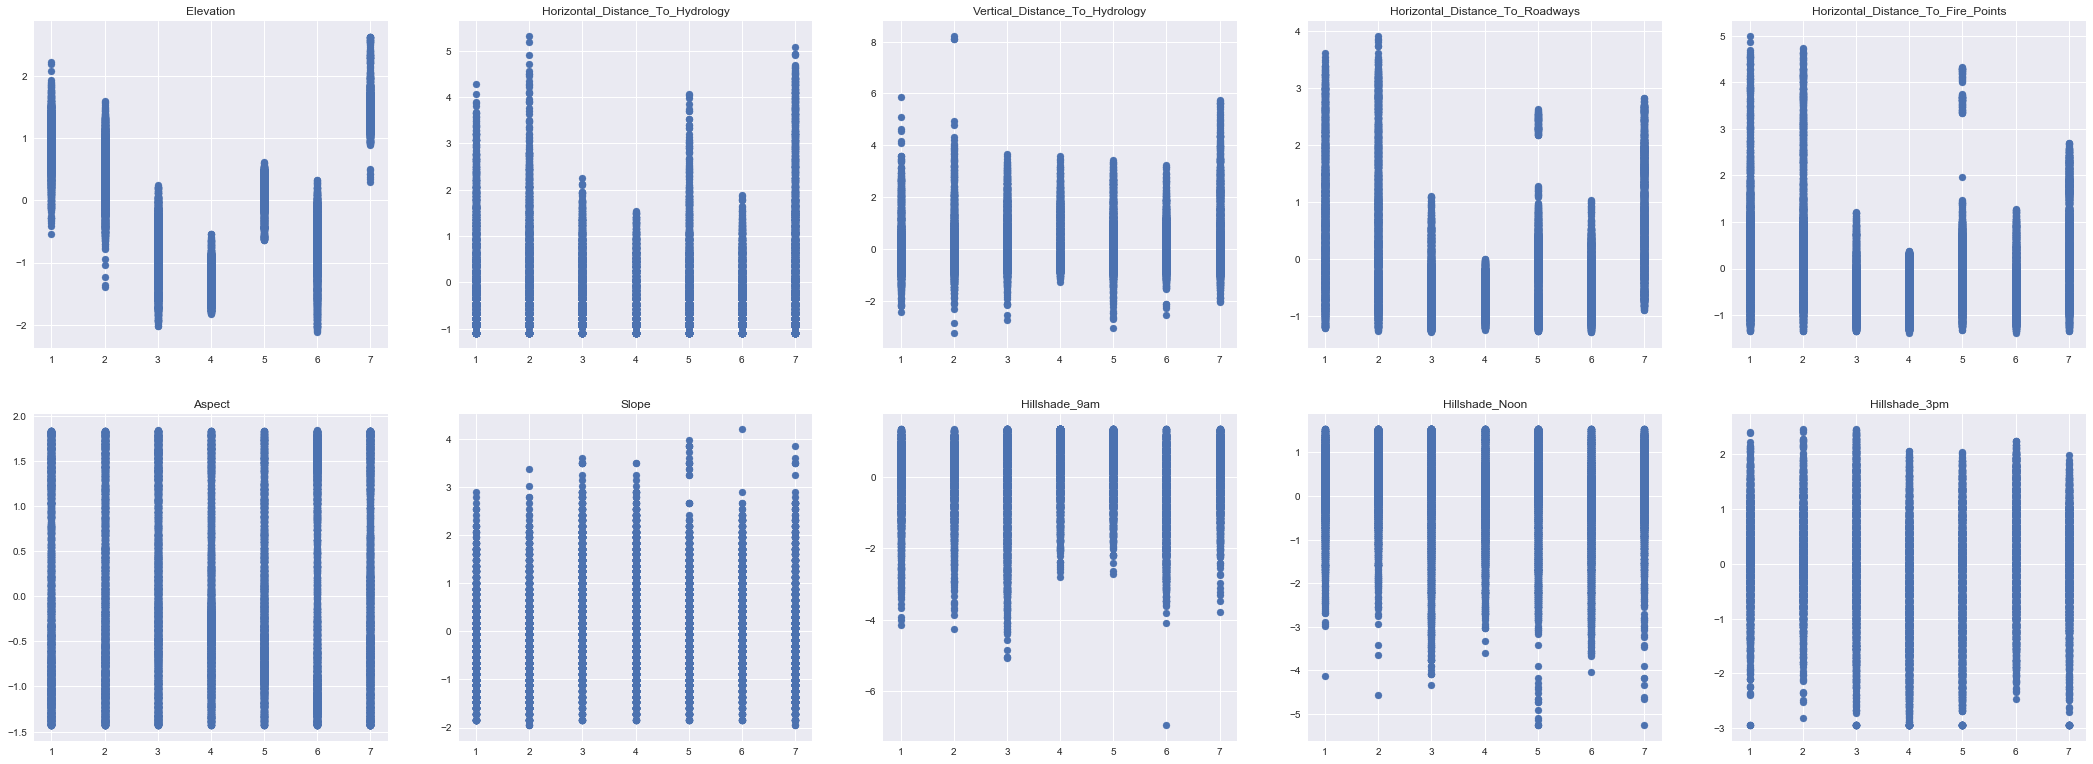

In [19]:
scatter_column_range_by_covertype(num_features)

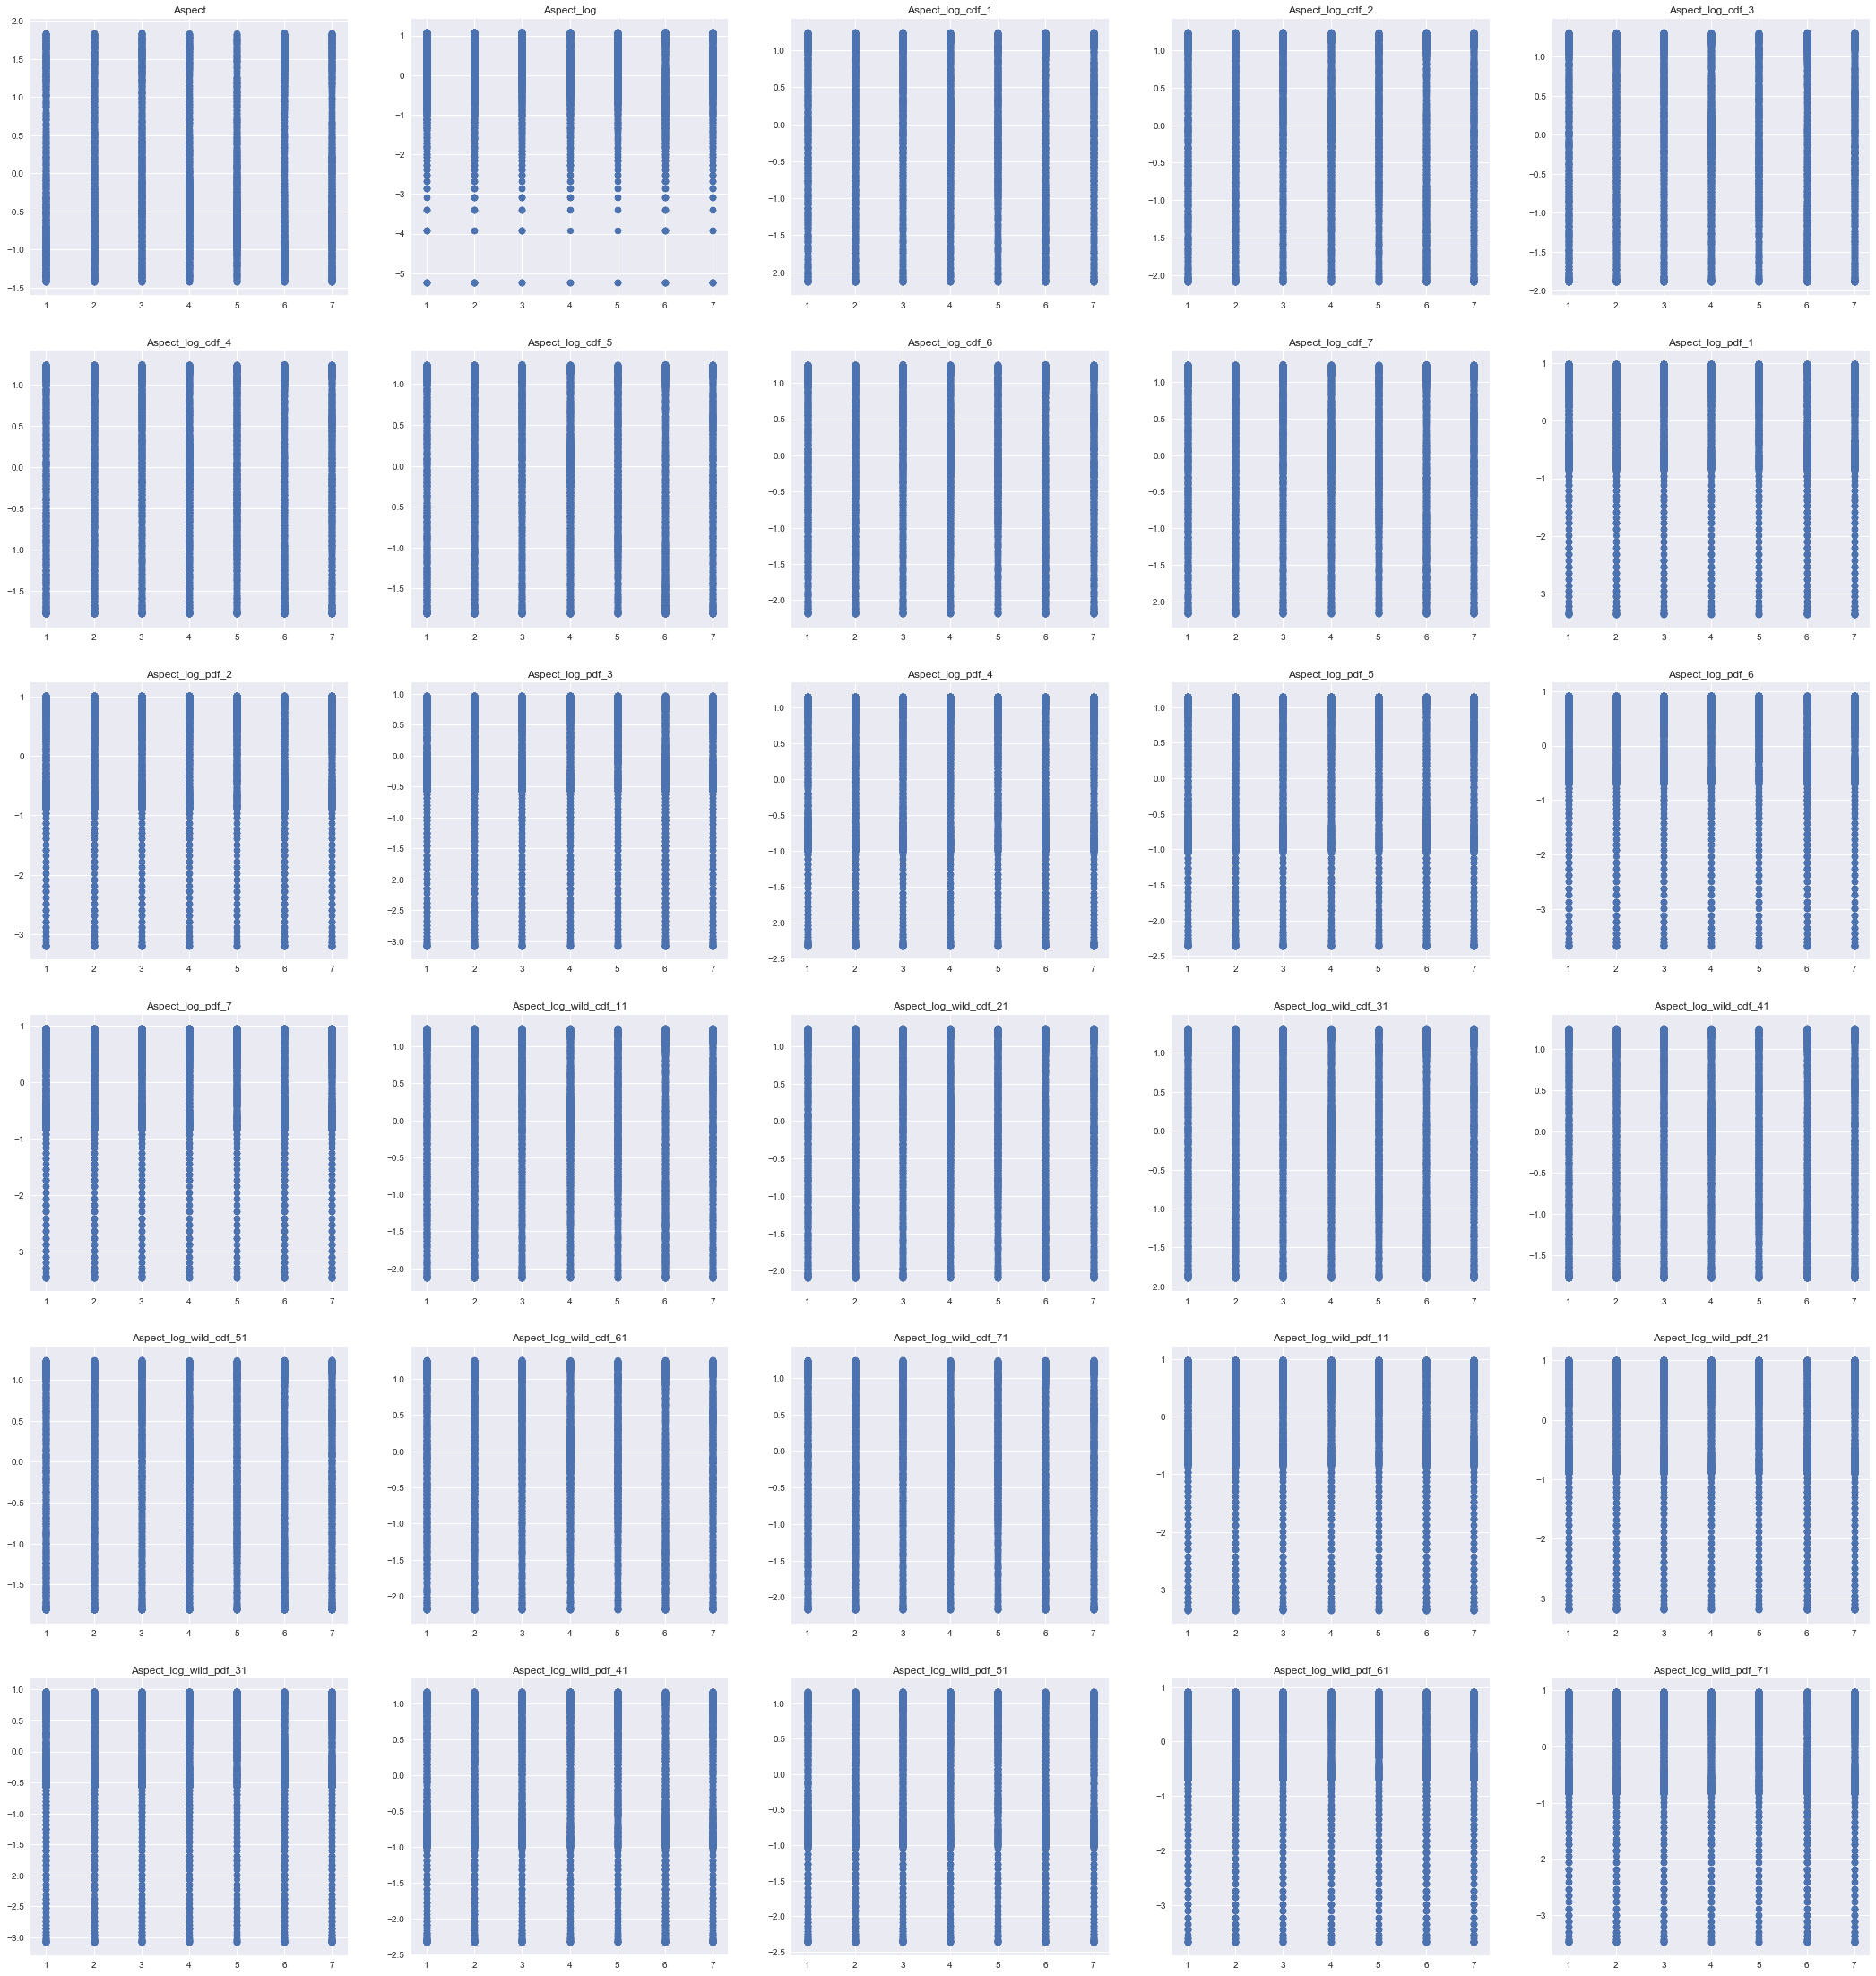

In [20]:
aspect_rel_cols = ['Aspect','Aspect_log','Aspect_log_cdf_1','Aspect_log_cdf_2','Aspect_log_cdf_3',
                 'Aspect_log_cdf_4','Aspect_log_cdf_5','Aspect_log_cdf_6','Aspect_log_cdf_7',
                 'Aspect_log_pdf_1','Aspect_log_pdf_2','Aspect_log_pdf_3','Aspect_log_pdf_4',
                 'Aspect_log_pdf_5','Aspect_log_pdf_6','Aspect_log_pdf_7','Aspect_log_wild_cdf_11',
                 'Aspect_log_wild_cdf_21','Aspect_log_wild_cdf_31','Aspect_log_wild_cdf_41',
                 'Aspect_log_wild_cdf_51','Aspect_log_wild_cdf_61',
                 'Aspect_log_wild_cdf_71',
                 'Aspect_log_wild_pdf_11',
                 'Aspect_log_wild_pdf_21',
                 'Aspect_log_wild_pdf_31',
                 'Aspect_log_wild_pdf_41',
                 'Aspect_log_wild_pdf_51',
                 'Aspect_log_wild_pdf_61',
                 'Aspect_log_wild_pdf_71']

scatter_column_range_by_covertype(aspect_rel_cols, rows=6)

In [21]:
aspect_rel_cols.remove('Aspect')
aspect_rel_cols.remove('Aspect_log')
X_scaled_train = X_scaled_train.drop(aspect_rel_cols, axis=1)
X_scaled_test = X_scaled_test.drop(aspect_rel_cols, axis=1)

In [22]:
elevation_rel_cols = [
 'Elevation', 'Elevation_log',
 'Elevation_log_cdf_1','Elevation_log_cdf_2', 'Elevation_log_cdf_3', 'Elevation_log_cdf_4',
 'Elevation_log_cdf_5', 'Elevation_log_cdf_6', 'Elevation_log_cdf_7', 'Elevation_log_pdf_1',
 'Elevation_log_pdf_2', 'Elevation_log_pdf_3', 'Elevation_log_pdf_4', 'Elevation_log_pdf_5',
 'Elevation_log_pdf_6', 'Elevation_log_pdf_7', 'Elevation_log_wild_cdf_11', 'Elevation_log_wild_cdf_21',
 'Elevation_log_wild_cdf_31', 'Elevation_log_wild_cdf_41', 'Elevation_log_wild_cdf_51', 'Elevation_log_wild_cdf_61',
 'Elevation_log_wild_cdf_71', 'Elevation_log_wild_pdf_11', 'Elevation_log_wild_pdf_21', 'Elevation_log_wild_pdf_31', 
 'Elevation_log_wild_pdf_41', 'Elevation_log_wild_pdf_51', 'Elevation_log_wild_pdf_61', 'Elevation_log_wild_pdf_71'
]

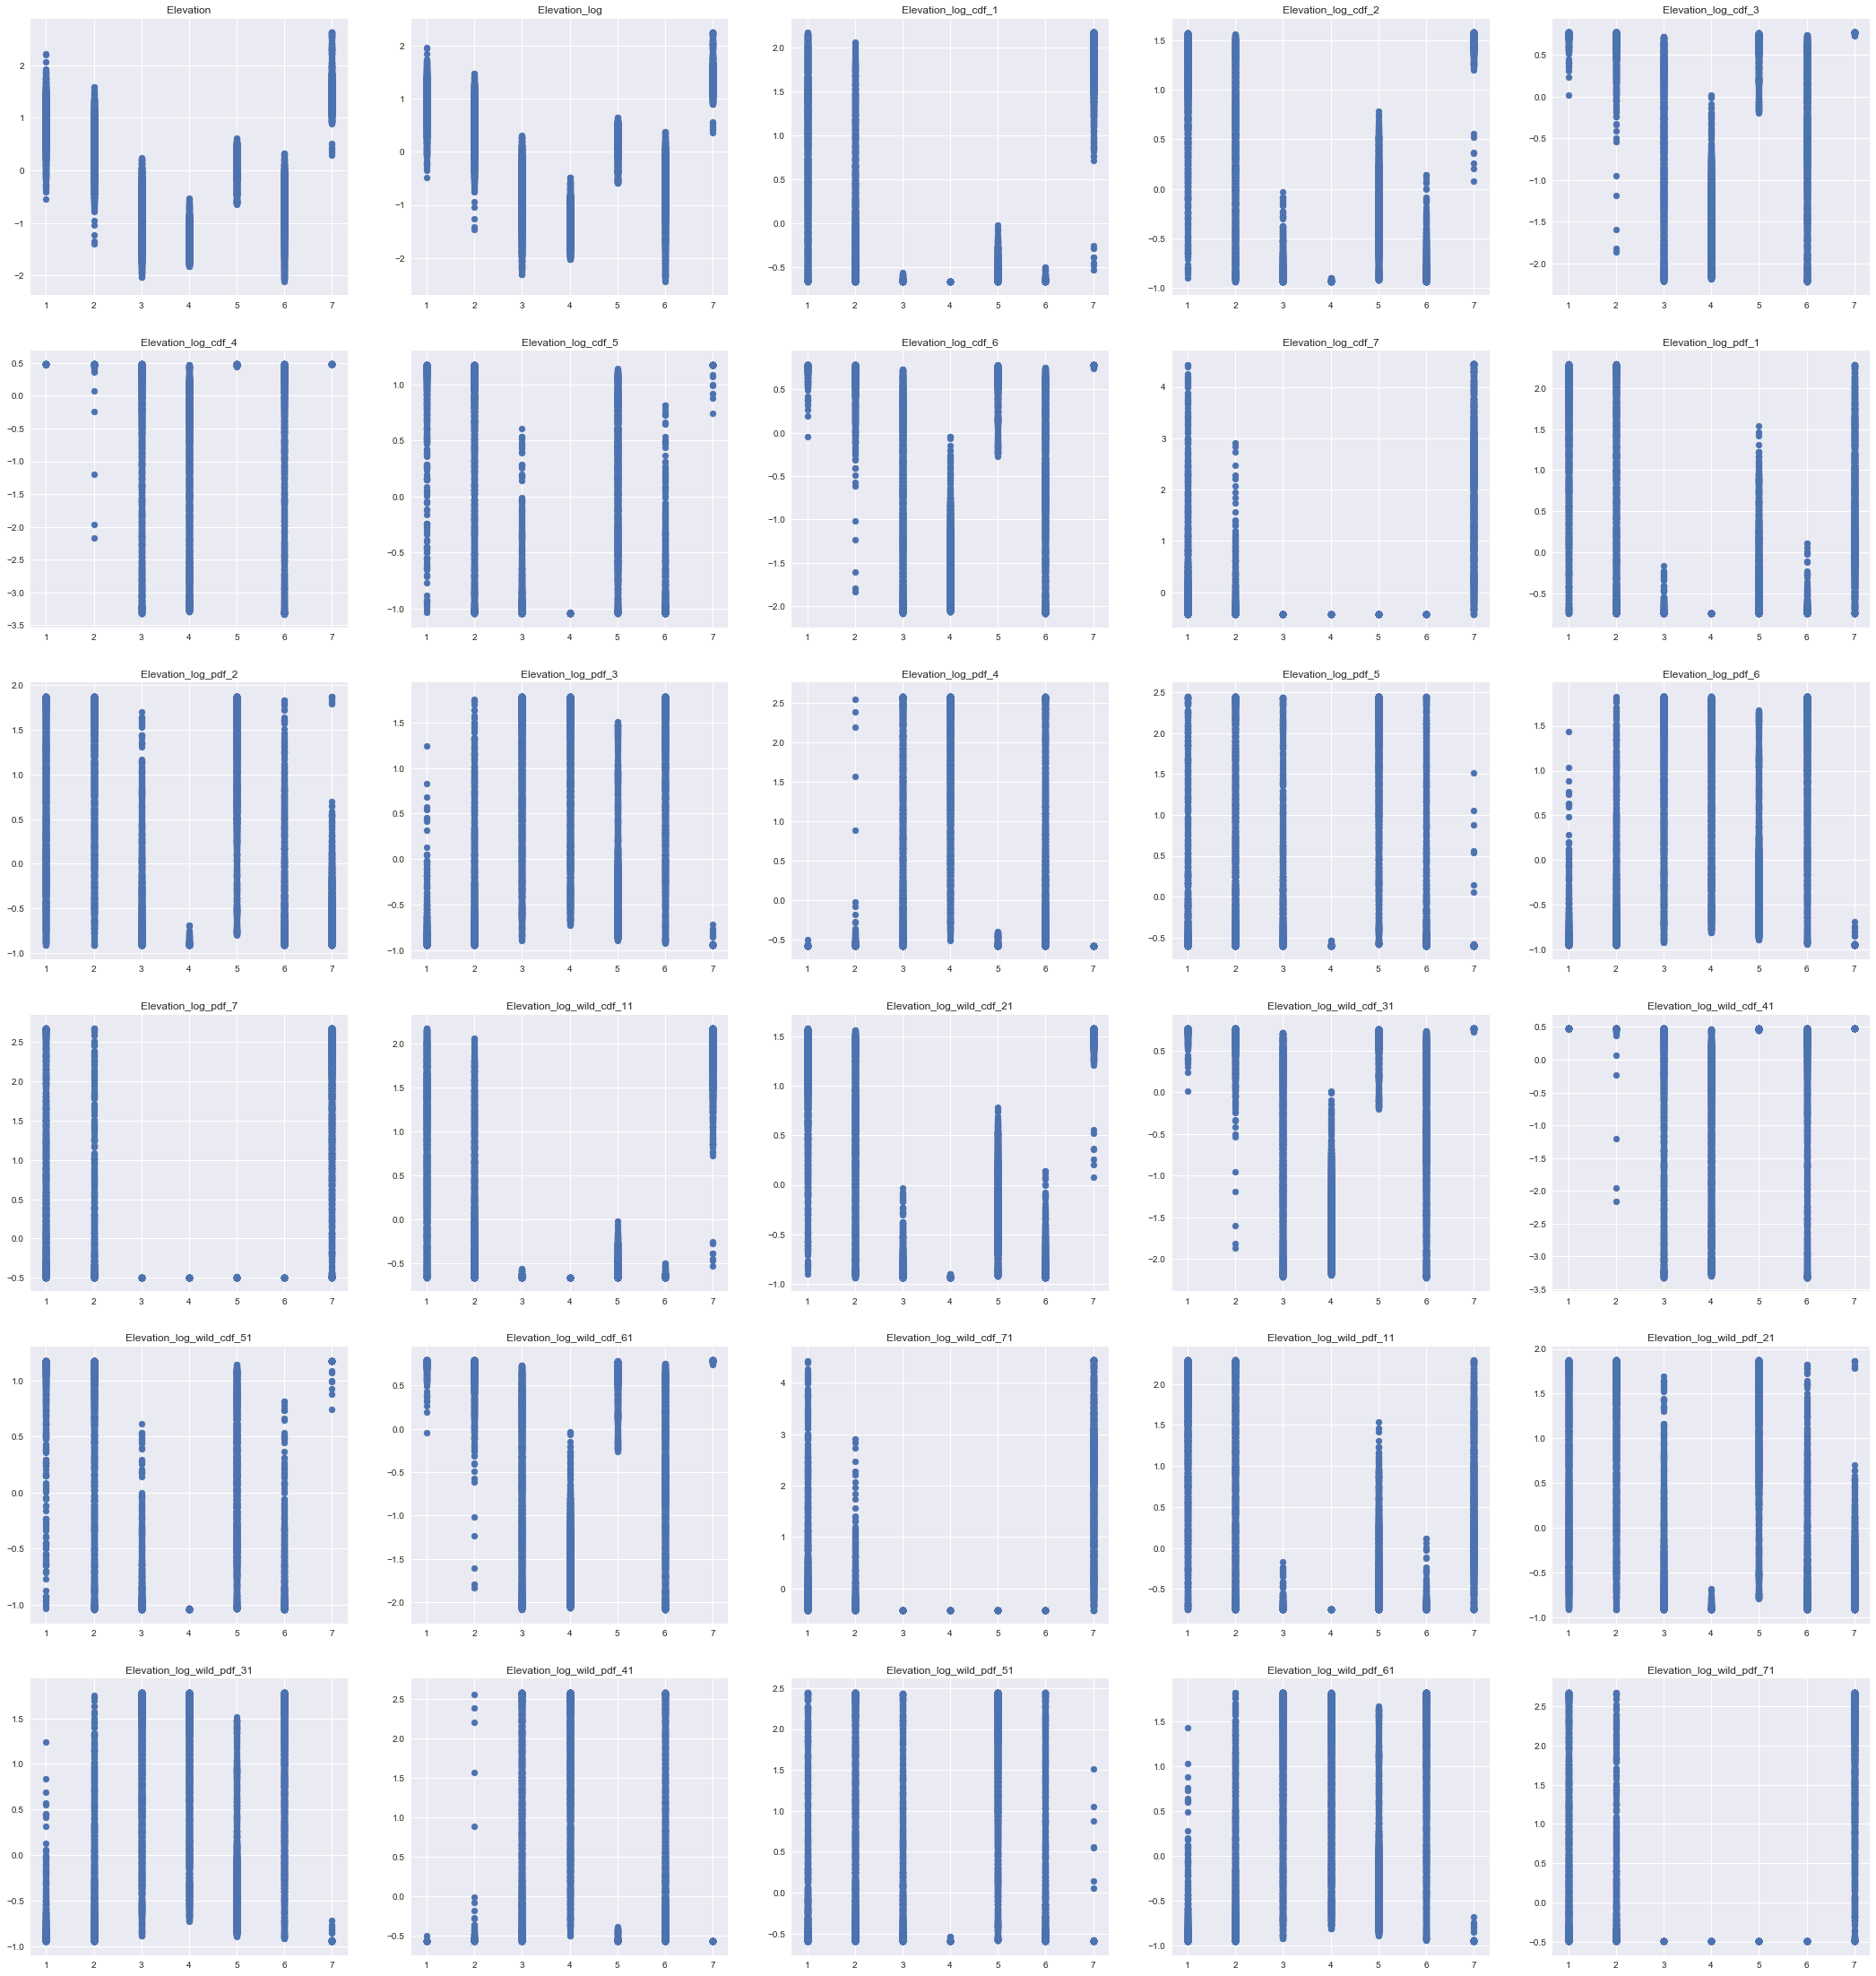

In [23]:
scatter_column_range_by_covertype(elevation_rel_cols, rows=6)

* We decide to keep all the columns related with `Elevation`

In [24]:
slope_rel_cols = ['Slope','Slope_log', 'Slope_log_cdf_1', 'Slope_log_cdf_2',
 'Slope_log_cdf_3', 'Slope_log_cdf_4', 'Slope_log_cdf_5',
 'Slope_log_cdf_6', 'Slope_log_cdf_7', 'Slope_log_pdf_1',
 'Slope_log_pdf_2', 'Slope_log_pdf_3', 'Slope_log_pdf_4',
 'Slope_log_pdf_5', 'Slope_log_pdf_6', 'Slope_log_pdf_7',
 'Slope_log_wild_cdf_11', 'Slope_log_wild_cdf_21', 'Slope_log_wild_cdf_31',
 'Slope_log_wild_cdf_41', 'Slope_log_wild_cdf_51', 'Slope_log_wild_cdf_61',
 'Slope_log_wild_cdf_71', 'Slope_log_wild_pdf_11', 'Slope_log_wild_pdf_21',
 'Slope_log_wild_pdf_31', 'Slope_log_wild_pdf_41', 'Slope_log_wild_pdf_51',
 'Slope_log_wild_pdf_61', 'Slope_log_wild_pdf_71'
]

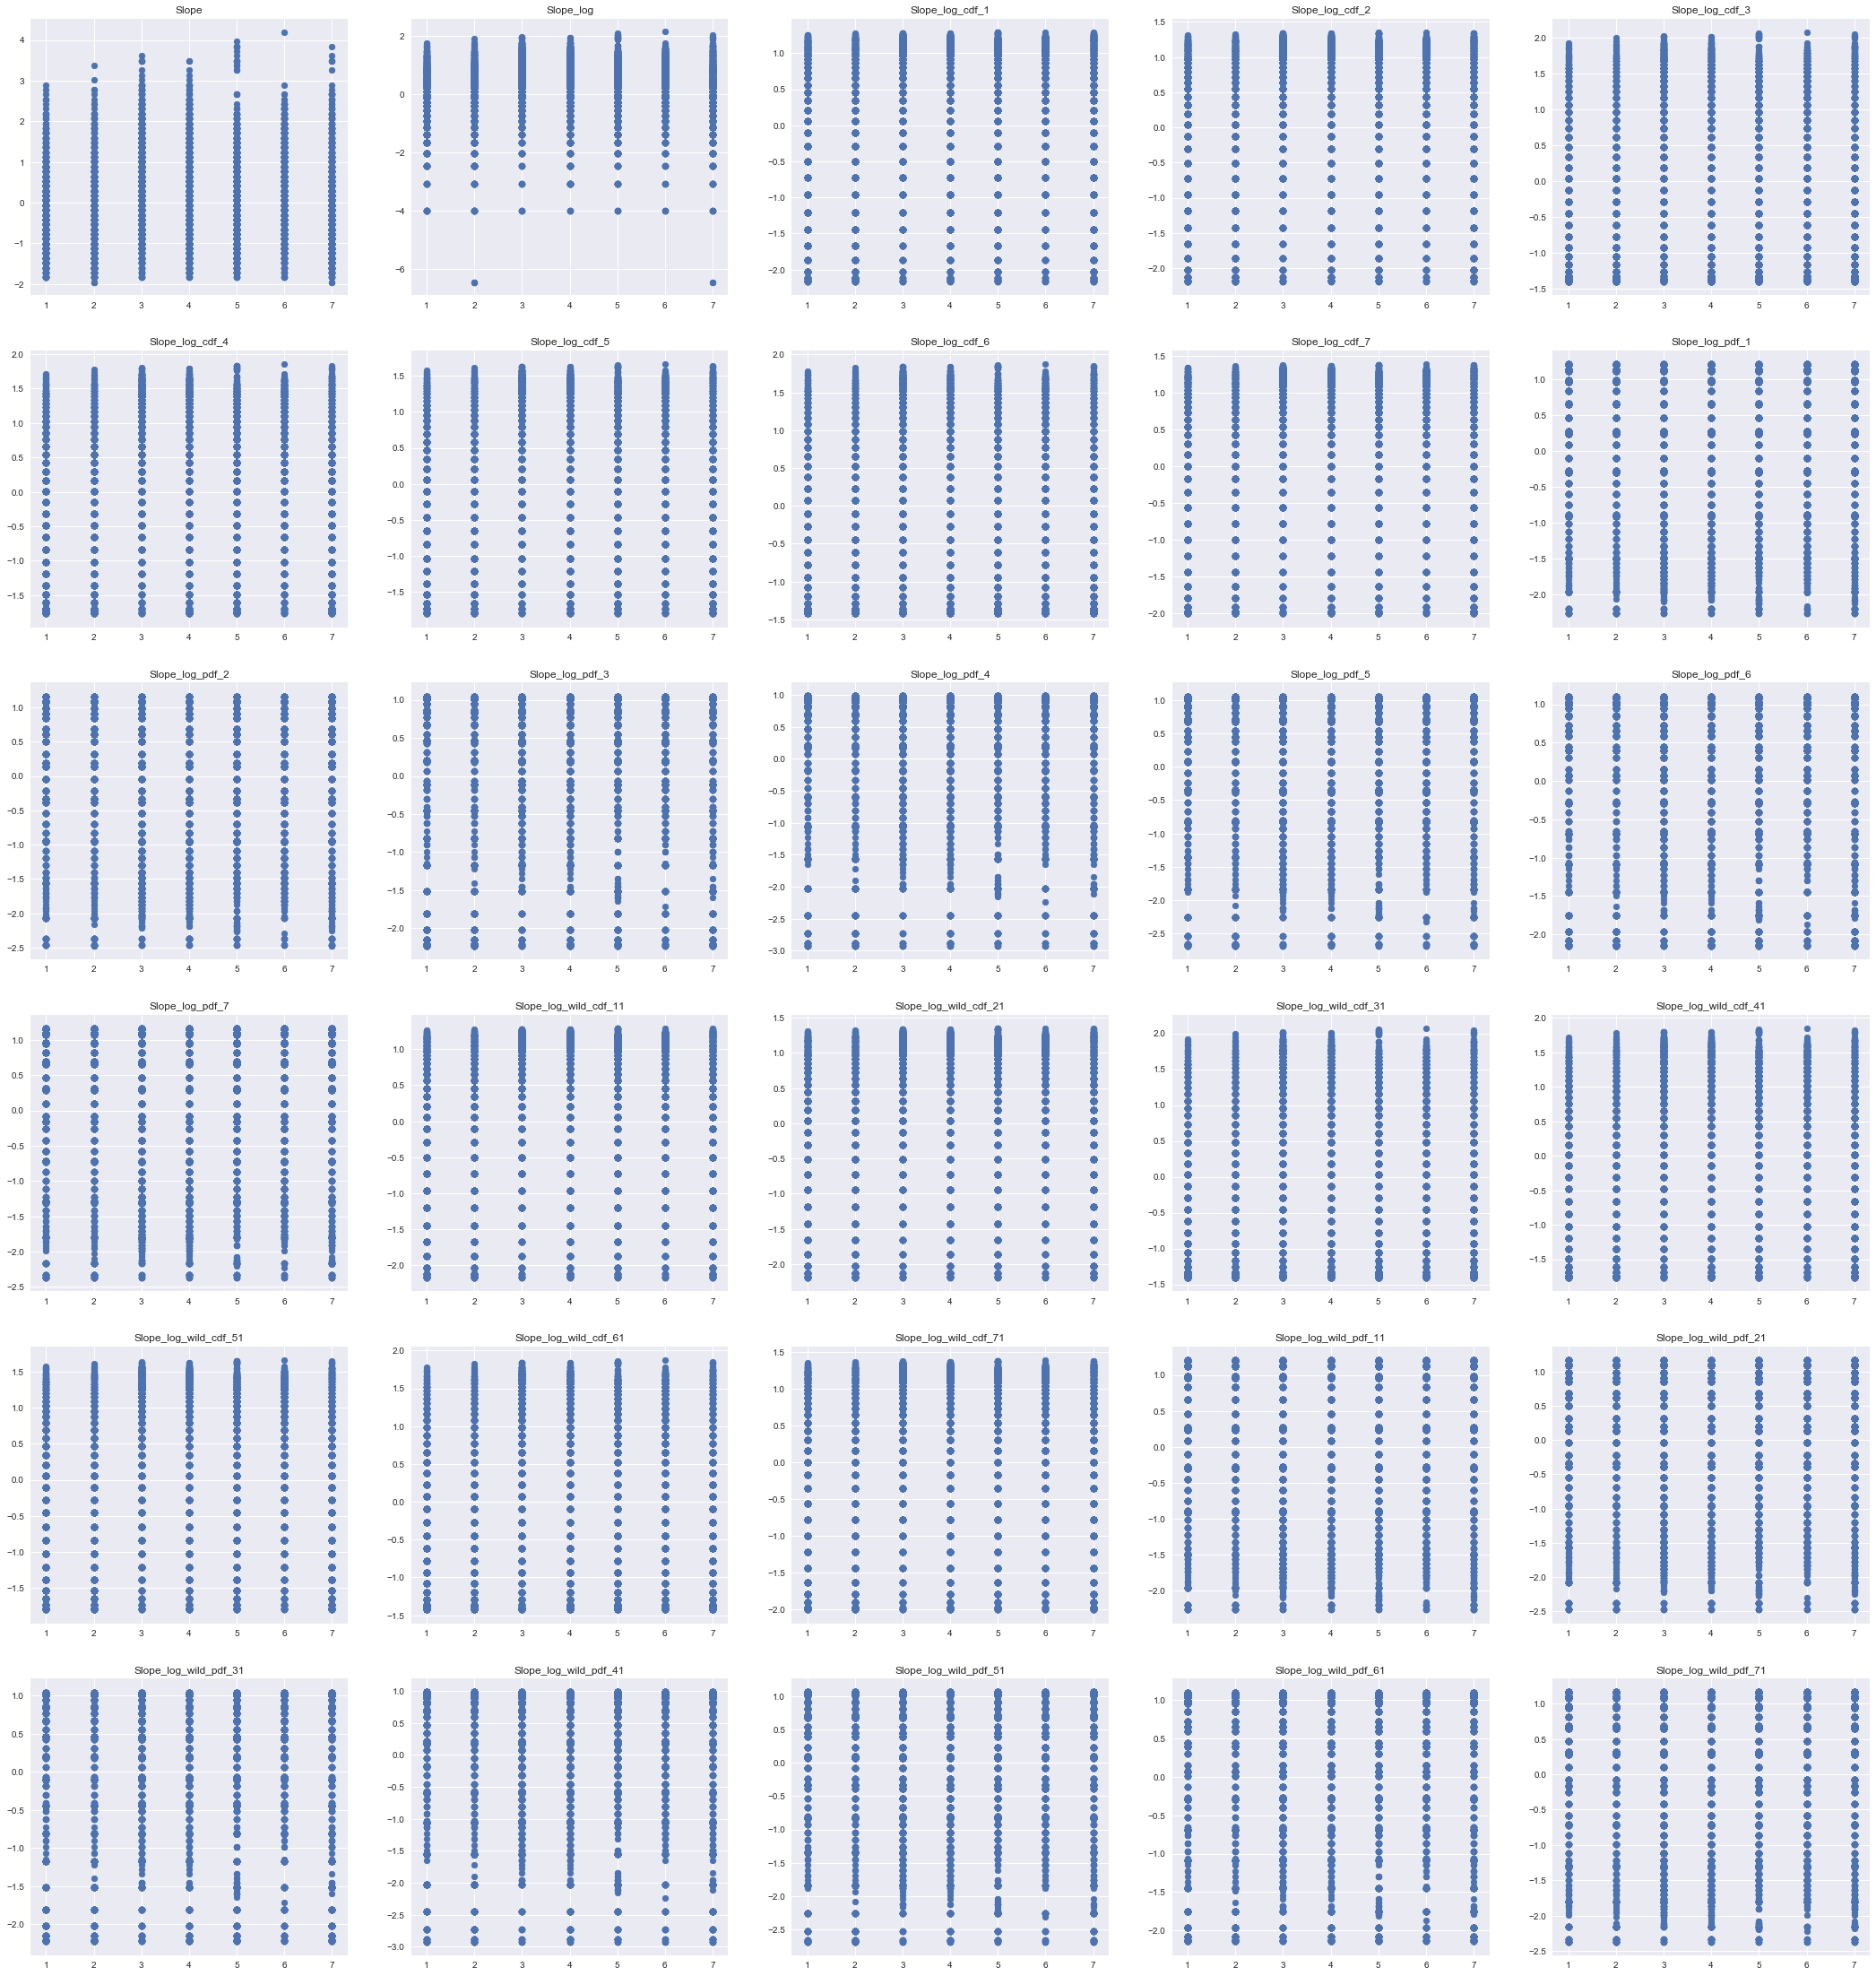

In [25]:
scatter_column_range_by_covertype(slope_rel_cols, rows=6)

In [26]:
slope_rel_cols.remove('Slope')
slope_rel_cols.remove('Slope_log')
X_scaled_train = X_scaled_train.drop(slope_rel_cols, axis=1)
X_scaled_test = X_scaled_test.drop(slope_rel_cols, axis=1)

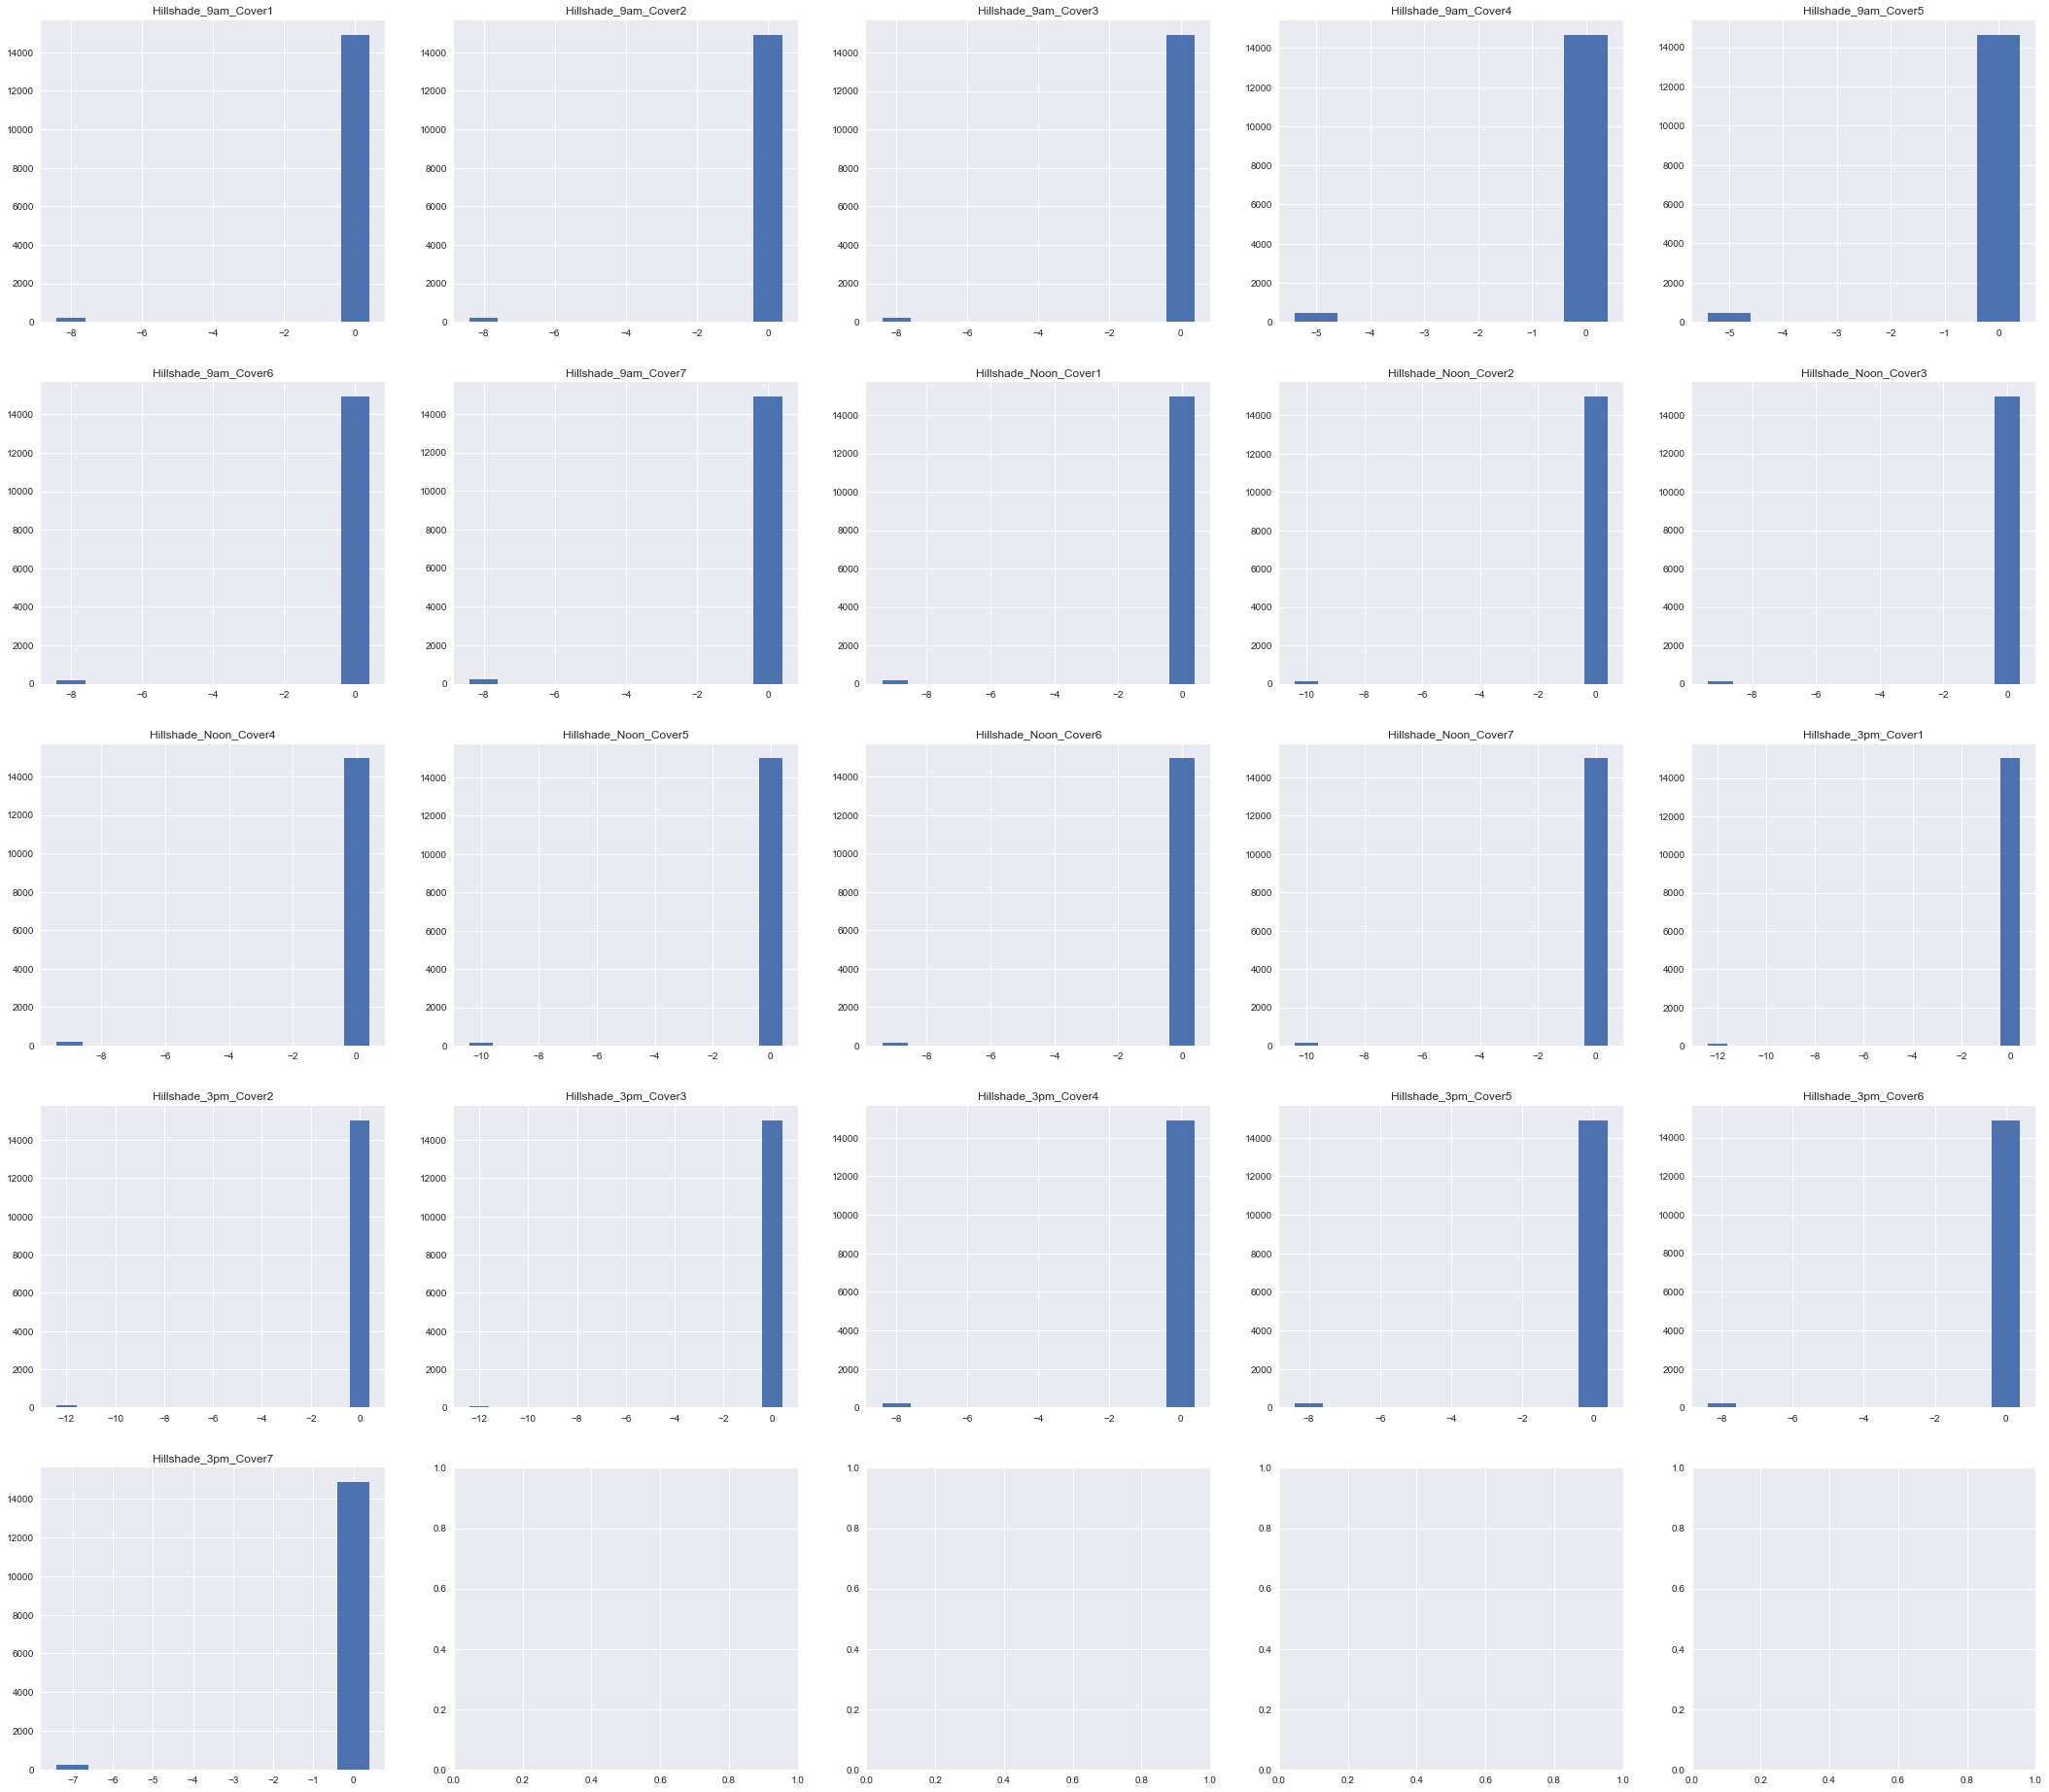

In [27]:
hillshade_cover_cols = ['Hillshade_9am_Cover1',
 'Hillshade_9am_Cover2',
 'Hillshade_9am_Cover3',
 'Hillshade_9am_Cover4',
 'Hillshade_9am_Cover5',
 'Hillshade_9am_Cover6',
 'Hillshade_9am_Cover7',
 'Hillshade_Noon_Cover1',
 'Hillshade_Noon_Cover2',
 'Hillshade_Noon_Cover3',
 'Hillshade_Noon_Cover4',
 'Hillshade_Noon_Cover5',
 'Hillshade_Noon_Cover6',
 'Hillshade_Noon_Cover7',
 'Hillshade_3pm_Cover1',
 'Hillshade_3pm_Cover2',
 'Hillshade_3pm_Cover3',
 'Hillshade_3pm_Cover4',
 'Hillshade_3pm_Cover5',
 'Hillshade_3pm_Cover6',
 'Hillshade_3pm_Cover7']
bar_column_range_by_covertype(hillshade_cover_cols, rows=5)

In [28]:
X_scaled_train = X_scaled_train.drop(hillshade_cover_cols, axis=1)
X_scaled_test = X_scaled_test.drop(hillshade_cover_cols, axis=1)

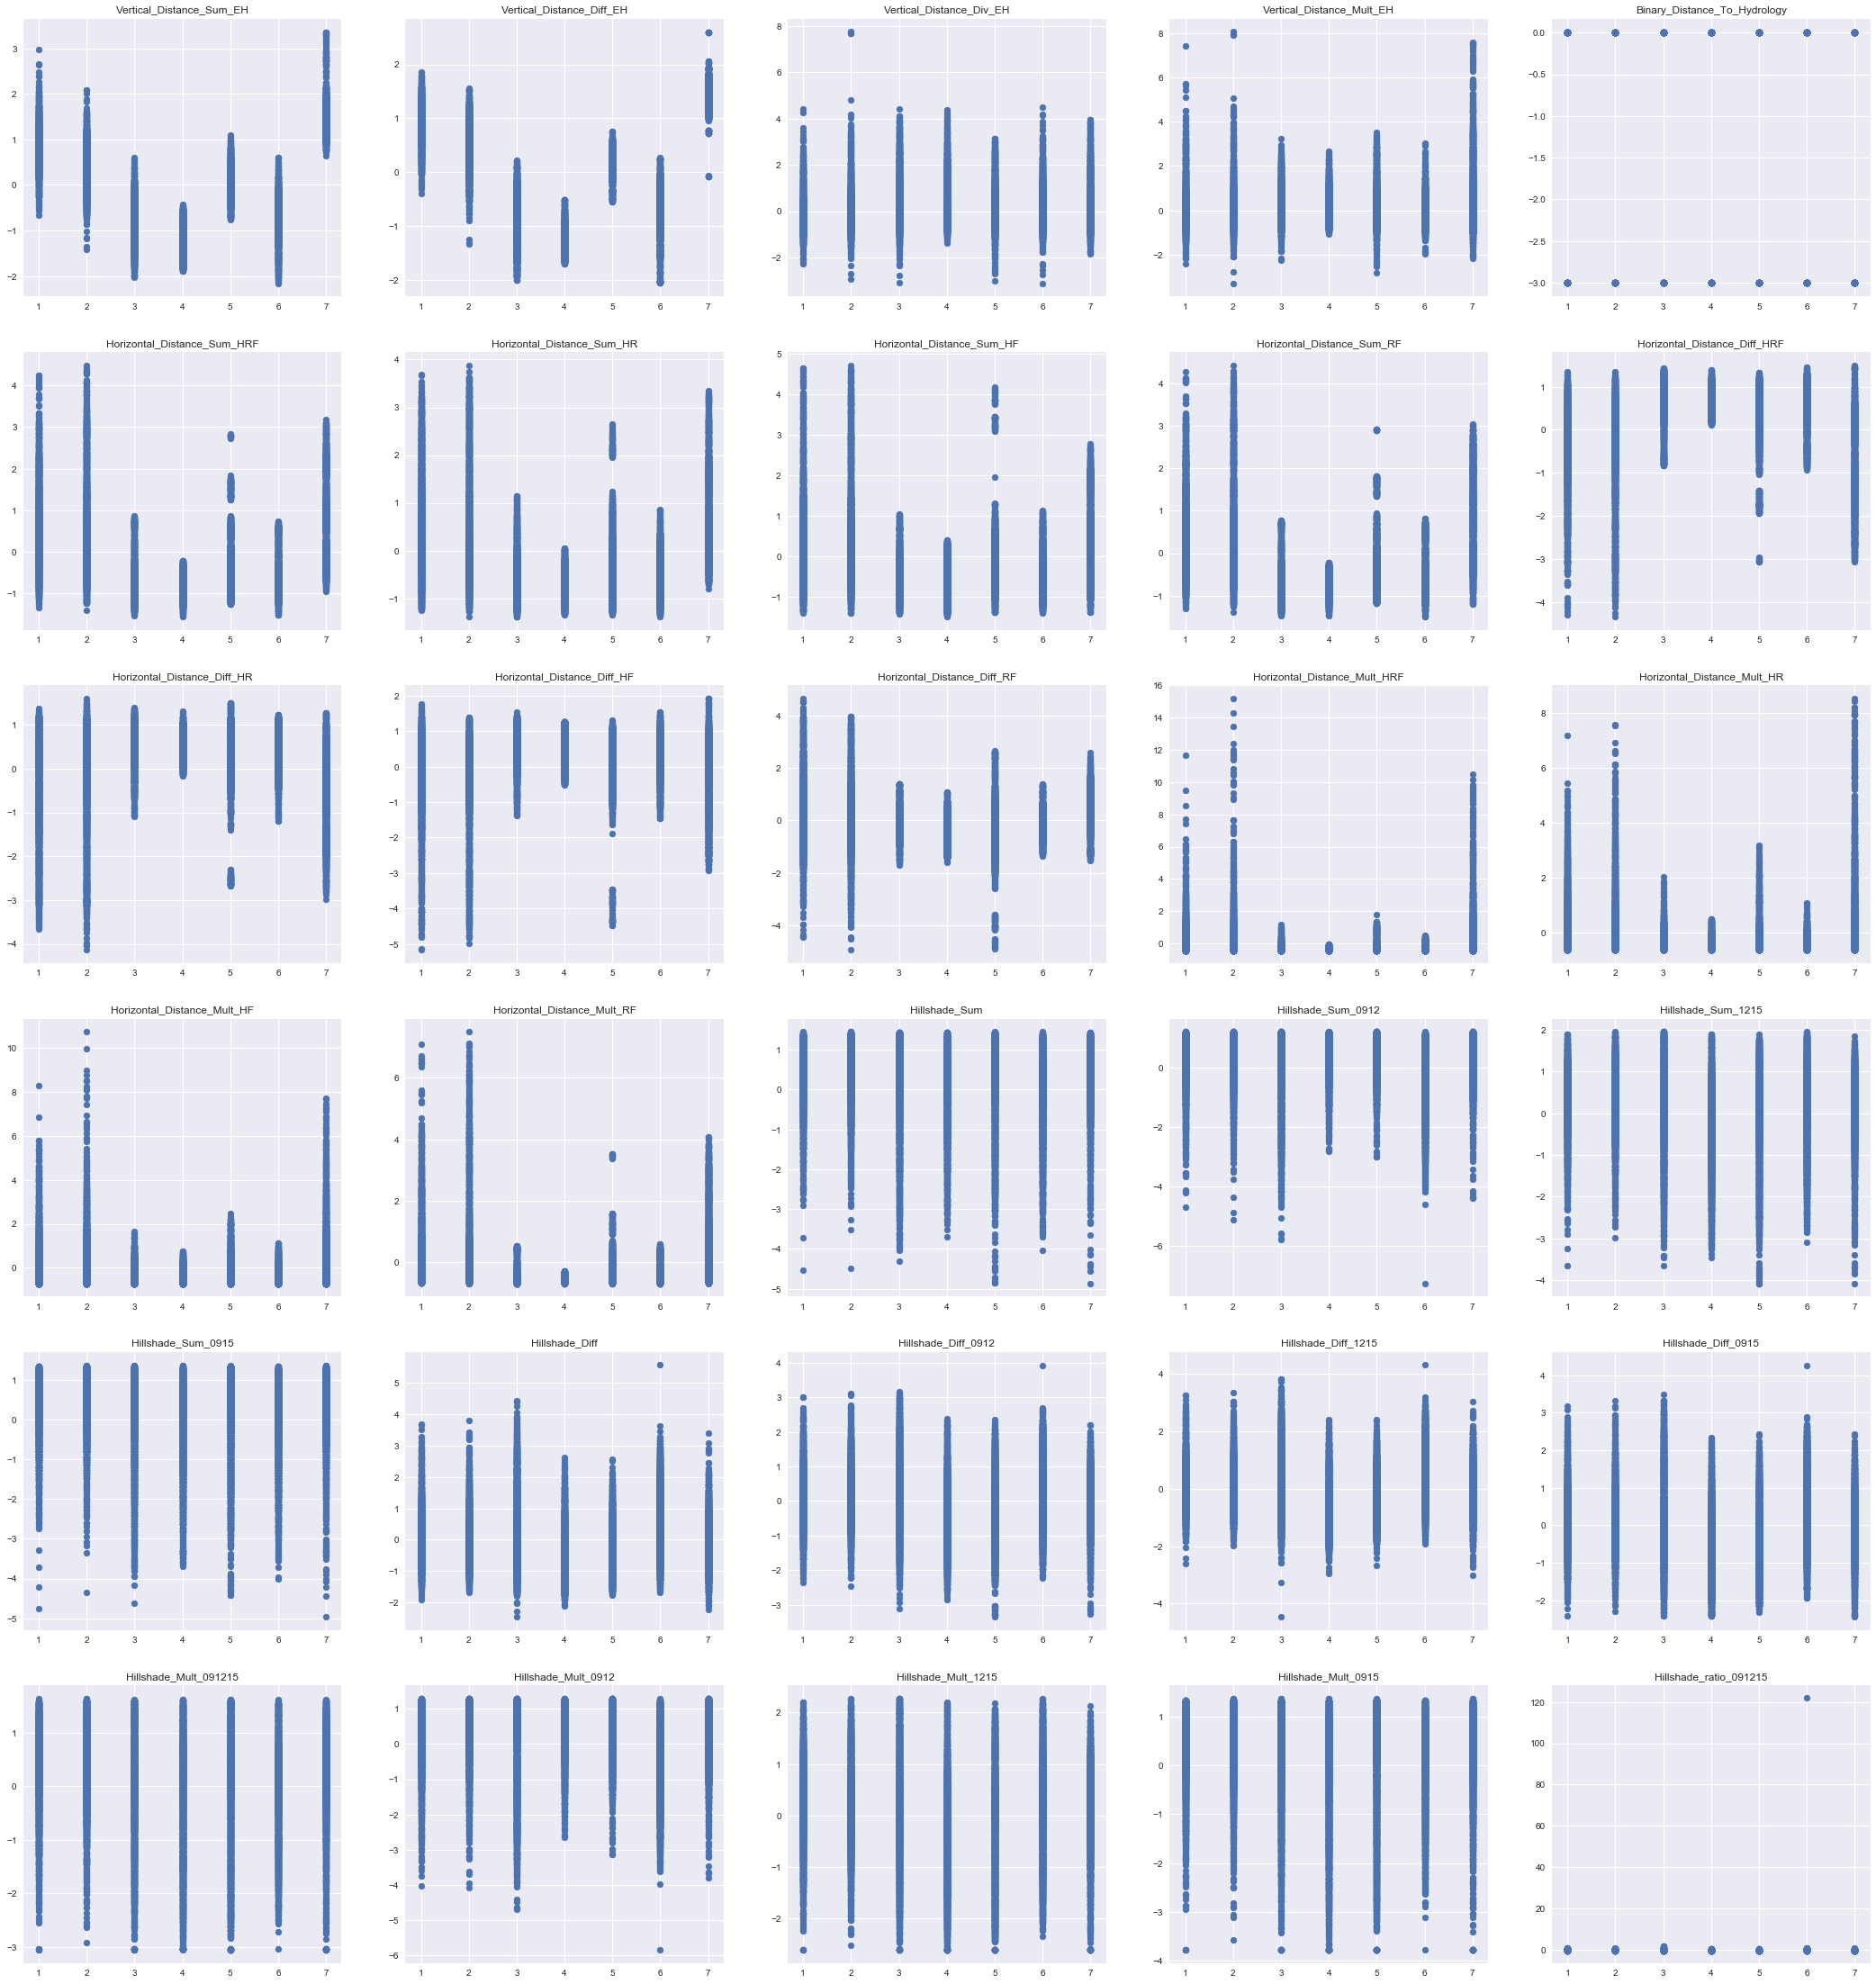

In [29]:
scatter_column_range_by_covertype(X_scaled_train.columns.tolist()[143:173], rows=6)

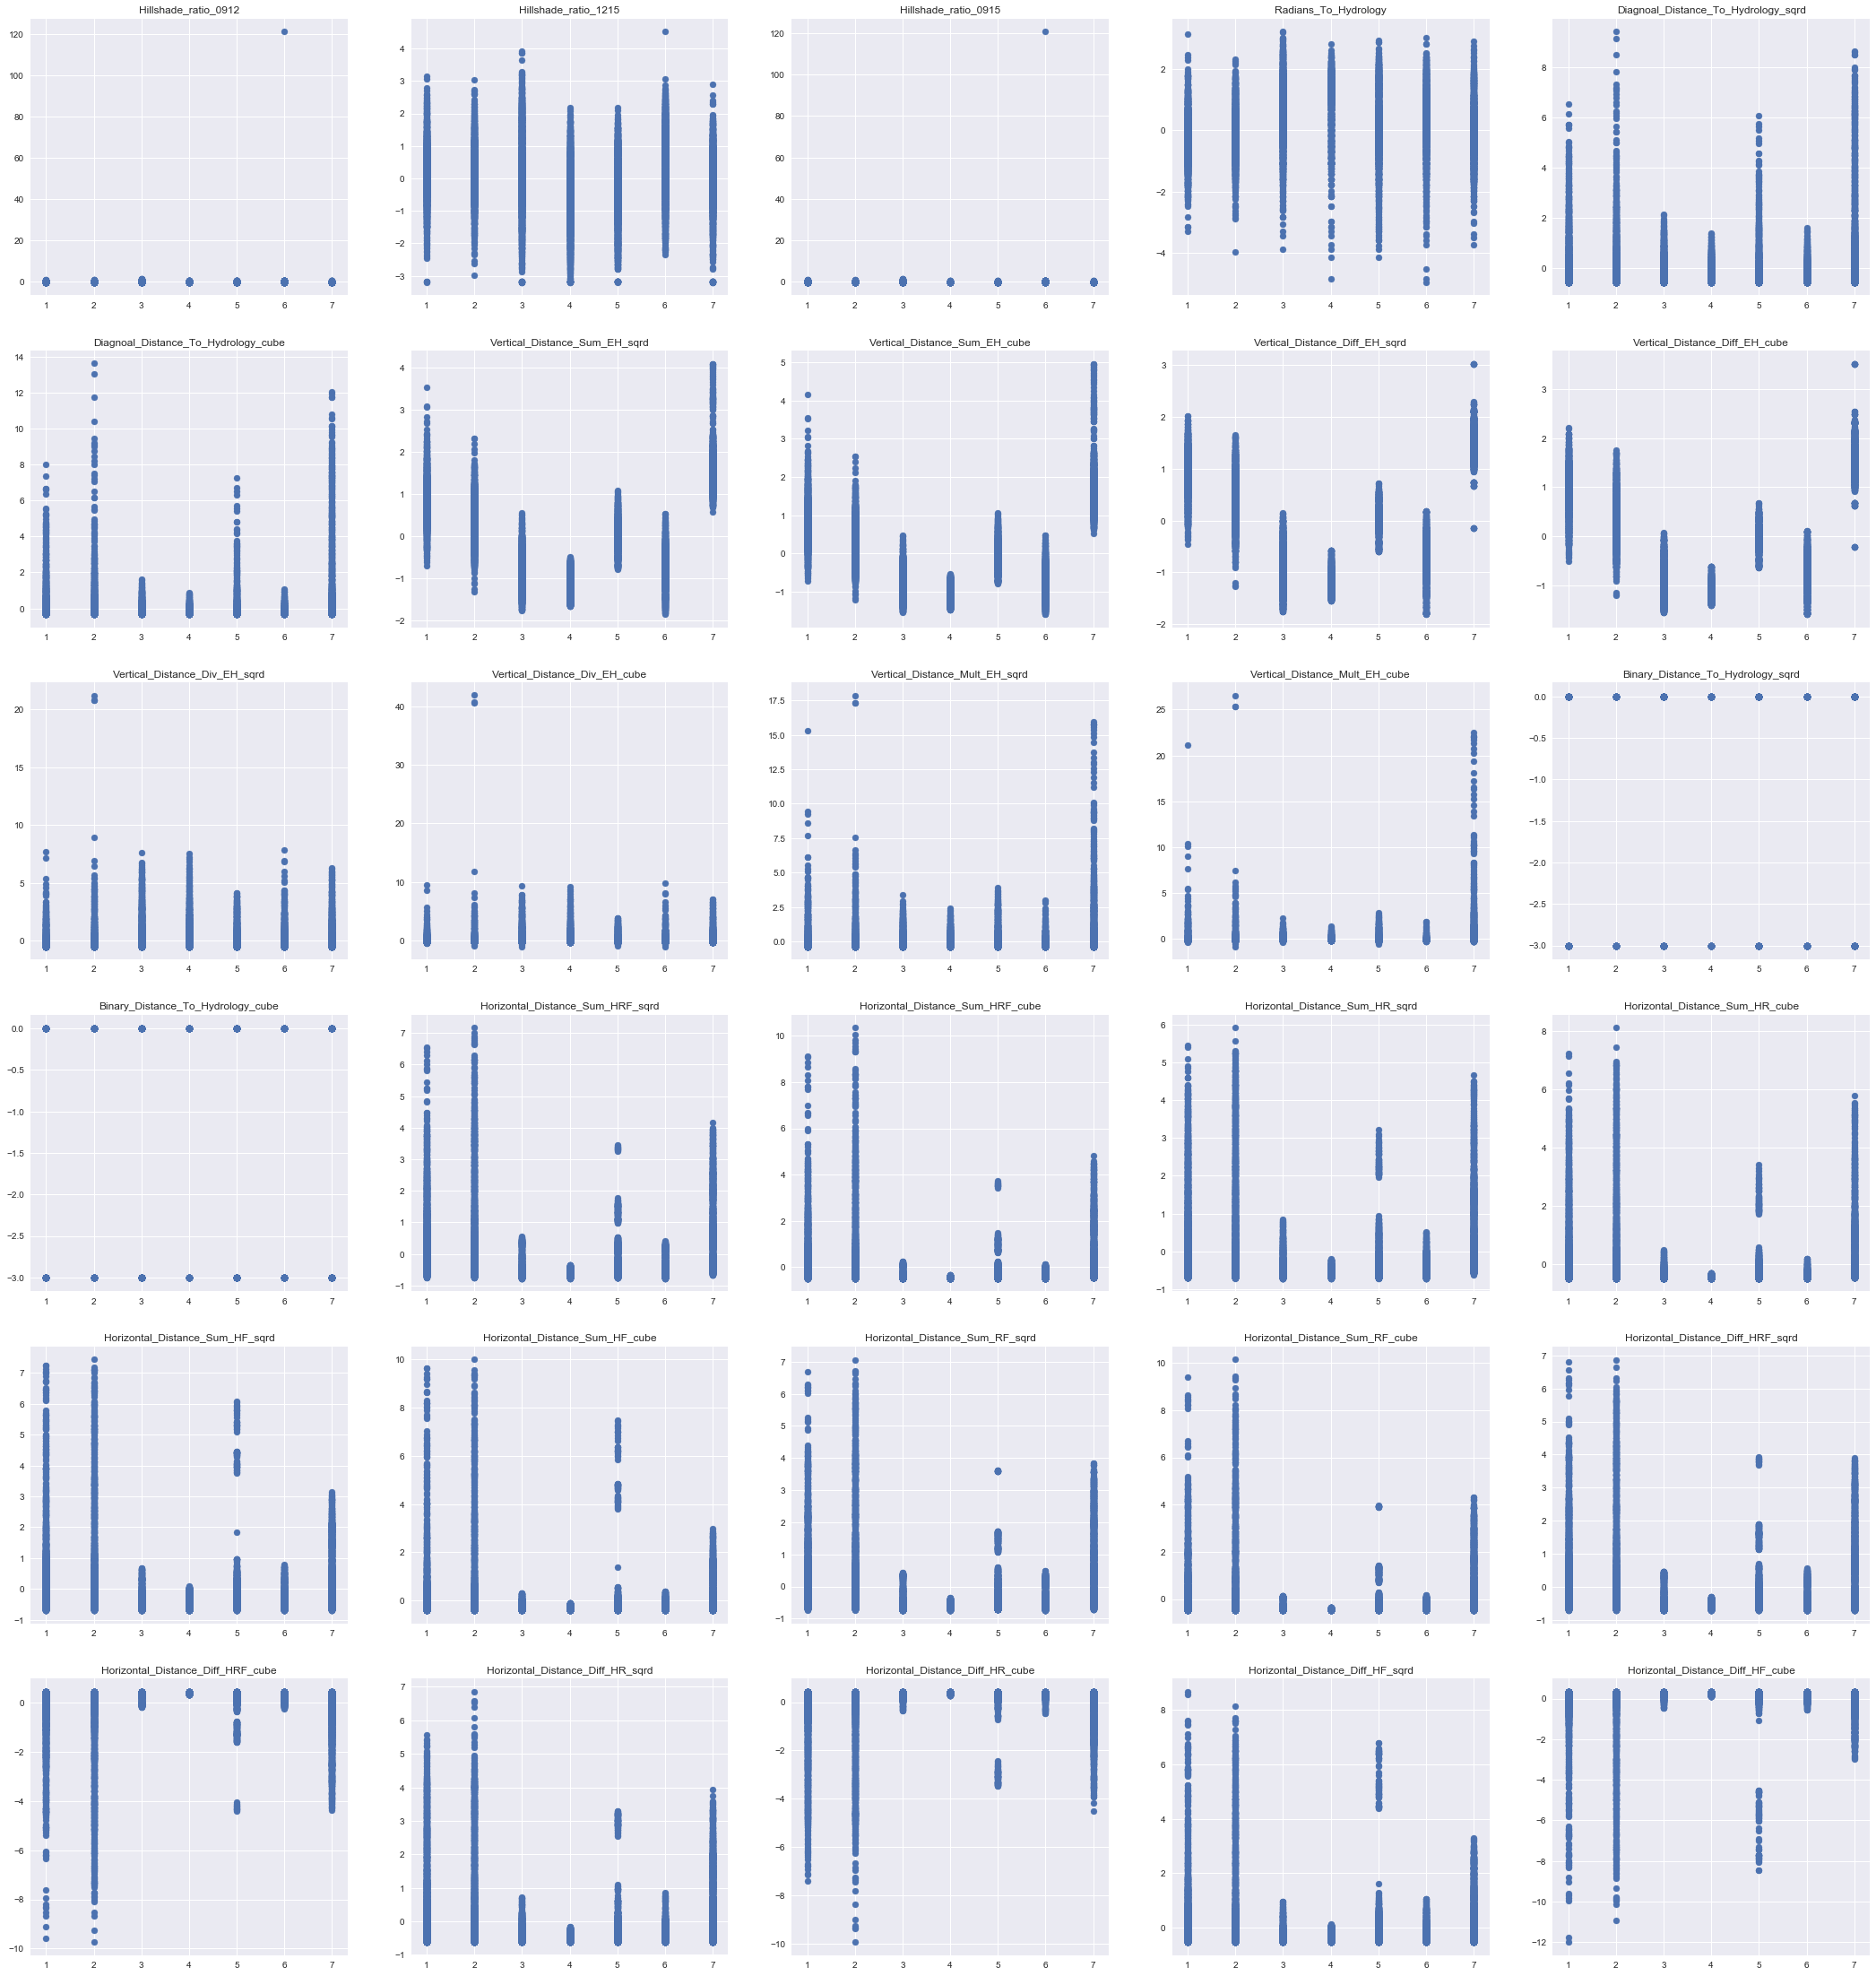

In [30]:
scatter_column_range_by_covertype(X_scaled_train.columns.tolist()[173:203], rows=6)

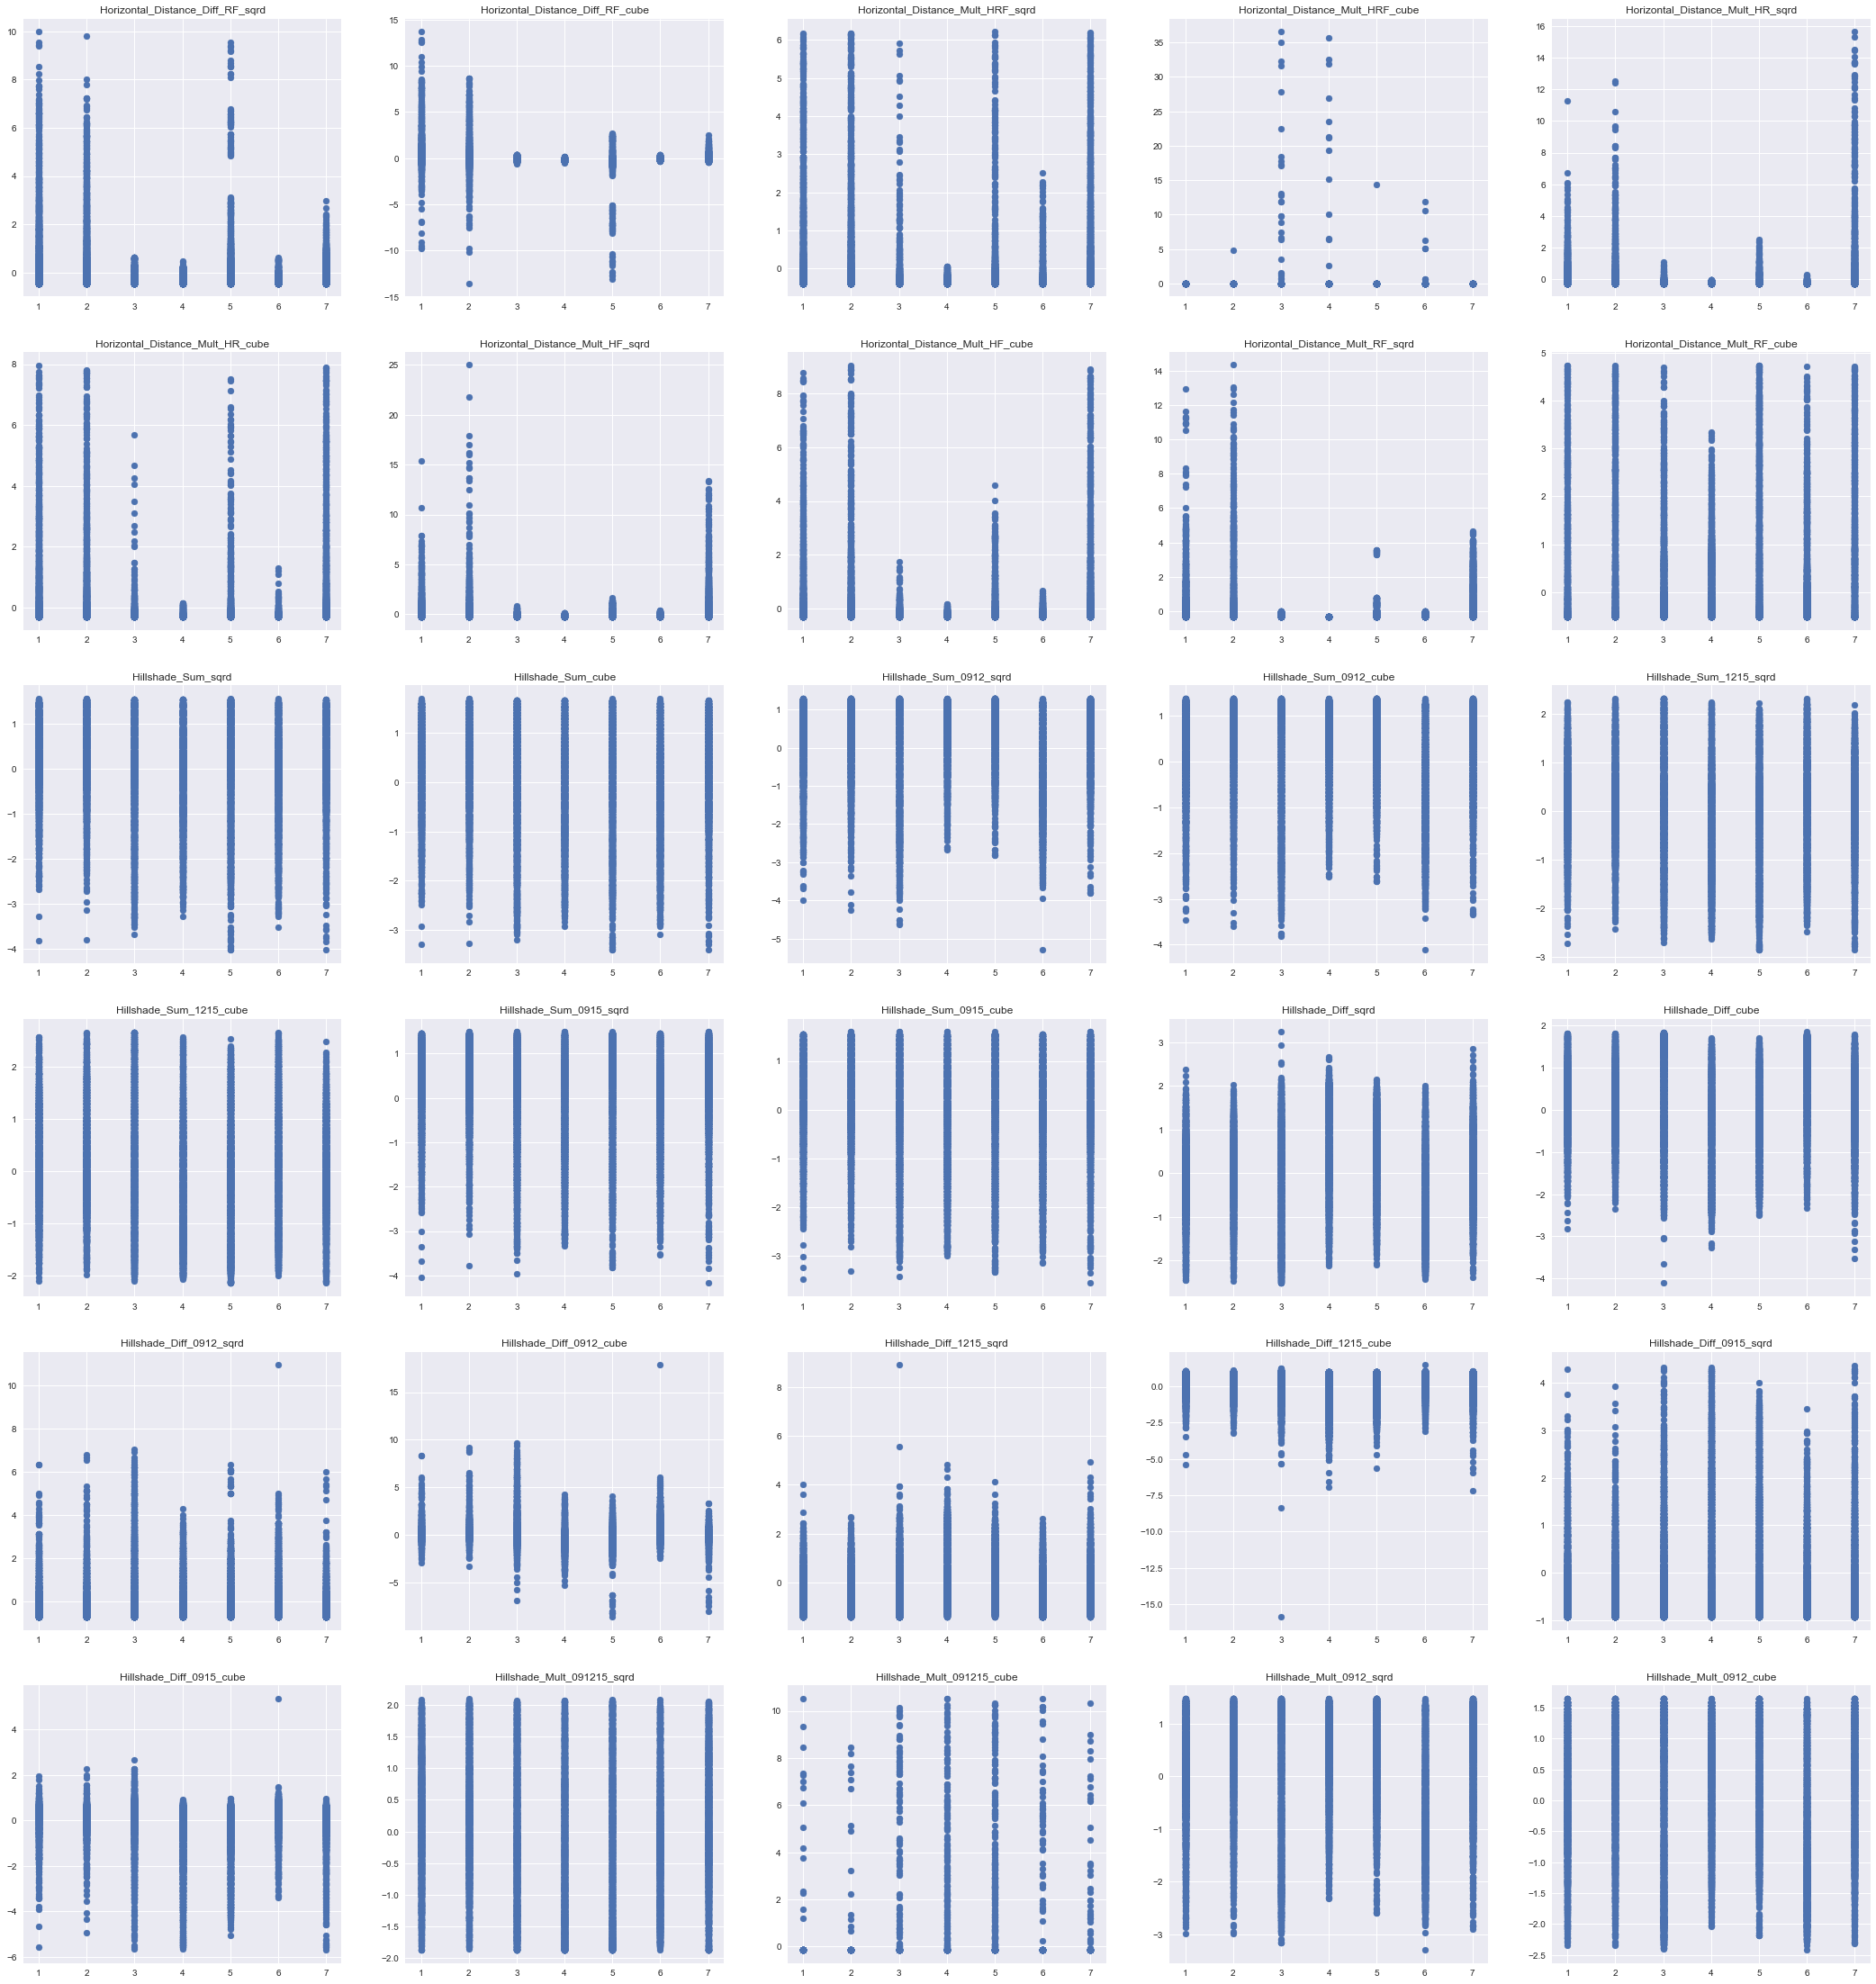

In [31]:
scatter_column_range_by_covertype(X_scaled_train.columns.tolist()[203:233], rows=6)

In [32]:
cols_to_drop = ['Hillshade_Mult_091215','Hillshade_Mult_1215','Hillshade_Mult_0915',
               'Hillshade_Mult_091215_sqrd', 'Hillshade_Mult_1215_sqrd', 'Hillshade_Mult_0915_sqrd',
               'Hillshade_Mult_091215_cube', 'Hillshade_Mult_1215_cube', 'Hillshade_Mult_0915_cube']
X_scaled_train = X_scaled_train.drop(cols_to_drop, axis=1)
X_scaled_test = X_scaled_test.drop(cols_to_drop, axis=1)

In [33]:
len(X_scaled_train.columns)

238

## Additional Feature Generation
**Concatenation with binary columns**
* We can also generate combined binary columns from many binary columns just like adding conditions

#### Example (combined binary column = `pclass_sex`)
pclass|sex|**pclass_sex**
---|---|---
3|male|**3male**
1|female|**1female**
3|female|**3female**
1|female|**1female**


In [34]:
# since we convert binary columns datatype to integer
binary_columns = X_scaled_test.select_dtypes(include=['integer']).columns

In [35]:
binary_columns

Index(['Soil_Type1', 'Soil_Type10', 'Soil_Type11', 'Soil_Type12',
       'Soil_Type13', 'Soil_Type14', 'Soil_Type16', 'Soil_Type17',
       'Soil_Type18', 'Soil_Type19', 'Soil_Type2', 'Soil_Type20',
       'Soil_Type21', 'Soil_Type22', 'Soil_Type23', 'Soil_Type24',
       'Soil_Type25', 'Soil_Type26', 'Soil_Type27', 'Soil_Type28',
       'Soil_Type29', 'Soil_Type3', 'Soil_Type30', 'Soil_Type31',
       'Soil_Type32', 'Soil_Type33', 'Soil_Type34', 'Soil_Type35',
       'Soil_Type36', 'Soil_Type37', 'Soil_Type38', 'Soil_Type39',
       'Soil_Type4', 'Soil_Type40', 'Soil_Type5', 'Soil_Type6', 'Soil_Type8',
       'Soil_Type9', 'Wilderness_Area1', 'Wilderness_Area2',
       'Wilderness_Area3', 'Wilderness_Area4', 'Slope_Direction_1',
       'Slope_Direction_2', 'Slope_Direction_3', 'Slope_Direction_4',
       'Slope_Direction_5', 'Slope_Direction_6', 'Slope_Direction_7',
       'Slope_Direction_8', 'Soils_Cover1', 'Soils_Cover2', 'Soils_Cover3',
       'Soils_Cover4', 'Soils_Cover5', 'Soil

### Combinations to generate

* `Elevation_Cover[1-7] + Wilderness_Area[1-4]
  * If this combination is proven to be effective, we will generate some more columns in this way.

In [36]:
X_scaled_train['Elevation_Cover1'].value_counts()

 0    9783
-1    5337
Name: Elevation_Cover1, dtype: int64

In [37]:
X_scaled_train['Elevation_Cover2'].value_counts()

 0    13327
-2     1793
Name: Elevation_Cover2, dtype: int64

In [38]:
X_scaled_train['Elevation_Cover3'].value_counts()

 0    8839
-1    6281
Name: Elevation_Cover3, dtype: int64

In [39]:
X_scaled_train['Elevation_Cover4'].value_counts()

0    9923
1    5197
Name: Elevation_Cover4, dtype: int64

In [40]:
X_scaled_train['Elevation_Cover5'].value_counts()

0    9477
1    5643
Name: Elevation_Cover5, dtype: int64

In [41]:
X_scaled_train['Elevation_Cover6'].value_counts()

 0    9251
-1    5869
Name: Elevation_Cover6, dtype: int64

In [42]:
X_scaled_train['Elevation_Cover7'].value_counts()

0    9108
1    6012
Name: Elevation_Cover7, dtype: int64

In [43]:
# combining 7 binary columns

X_scaled_train['Elevation_Cover'] =\
    X_scaled_train['Elevation_Cover1'].map({0:0, -1:1})+\
    X_scaled_train['Elevation_Cover2'].map({0:0, -2:1})+\
    X_scaled_train['Elevation_Cover3'].map({0:0, -1:1})+\
    X_scaled_train['Elevation_Cover4'].map({0:0, 1:1})+\
    X_scaled_train['Elevation_Cover5'].map({0:0, 1:1})+\
    X_scaled_train['Elevation_Cover6'].map({0:0, -1:1})+\
    X_scaled_train['Elevation_Cover7'].map({0:0, 1:1})
    

In [44]:
X_scaled_test['Elevation_Cover'] =\
    X_scaled_test['Elevation_Cover1'].map({0:0, -1:1})+\
    X_scaled_test['Elevation_Cover2'].map({0:0, -2:1})+\
    X_scaled_test['Elevation_Cover3'].map({0:0, -1:1})+\
    X_scaled_test['Elevation_Cover4'].map({0:0, 1:1})+\
    X_scaled_test['Elevation_Cover5'].map({0:0, 1:1})+\
    X_scaled_test['Elevation_Cover6'].map({0:0, -1:1})+\
    X_scaled_test['Elevation_Cover7'].map({0:0, 1:1})

In [45]:
X_scaled_train['Elevation_Cover_Wilderness'] = X_scaled_train['Elevation_Cover'] + X_scaled_train['Wilderness_Area']
X_scaled_test['Elevation_Cover_Wilderness'] = X_scaled_test['Elevation_Cover'] + X_scaled_test['Wilderness_Area']

In [46]:
X_scaled_train.shape

(15120, 240)

In [49]:
X_scaled_test.shape

(565892, 240)

In [ ]:
X_scaled_train.to_csv('data/X_scaled_train.csv', index=False)
X_scaled_test.to_csv('data/X_scaled_test.csv', index=False)

# Extract Feature Ranking using `sklearn.feature_selection.RFECV`
* RandomForest
* ExtraTreesClassifier
* XGBoost

In [50]:
rf = RandomForestClassifier(random_state=0)
selector_rf = RFECV(rf, cv=5)
selector_rf.fit(X_scaled_train, y_train.values.ravel())

RFECV(cv=5,
   estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False),
   n_jobs=1, scoring=None, step=1, verbose=0)

In [51]:
etc = ExtraTreesClassifier(random_state=0)
selector_etc = RFECV(etc, cv=5)
selector_etc.fit(X_scaled_train, y_train.values.ravel())

RFECV(cv=5,
   estimator=ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False),
   n_jobs=1, scoring=None, step=1, verbose=0)

In [52]:
etc_ent = ExtraTreesClassifier(random_state=0, criterion='entropy')
selector_etc_ent = RFECV(etc_ent, cv=5)
selector_etc_ent.fit(X_scaled_train, y_train.values.ravel())

RFECV(cv=5,
   estimator=ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='entropy',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False),
   n_jobs=1, scoring=None, step=1, verbose=0)

In [58]:
rf_rfecv_cols = X_scaled_train.columns[selector_rf.support_].tolist()
etc_gini_rfecv_cols = X_scaled_train.columns[selector_etc.support_].tolist()
etc_ent_rfecv_cols = X_scaled_train.columns[selector_etc_ent.support_].tolist()

In [61]:
len(rf_rfecv_cols), len(etc_gini_rfecv_cols), len(etc_ent_rfecv_cols)

(44, 87, 109)

In [64]:
rf_rfecv_cols

['Aspect_log',
 'Elevation',
 'Elevation_log',
 'Elevation_log_cdf_2',
 'Elevation_log_cdf_3',
 'Elevation_log_cdf_6',
 'Elevation_log_wild_cdf_51',
 'Elevation_log_wild_cdf_61',
 'Hillshade_Noon_log',
 'Horizontal_Distance_To_Roadways',
 'Horizontal_Distance_To_Roadways_log',
 'Soil_Type',
 'Aspect_sqrd',
 'Horizontal_Distance_To_Roadways_cube',
 'Horizontal_Distance_To_Fire_Points_sqrd',
 'Diagnoal_Distance_To_Hydrology',
 'Vertical_Distance_Diff_EH',
 'Vertical_Distance_Div_EH',
 'Horizontal_Distance_Sum_HF',
 'Horizontal_Distance_Diff_HRF',
 'Horizontal_Distance_Diff_HR',
 'Horizontal_Distance_Diff_HF',
 'Horizontal_Distance_Diff_RF',
 'Hillshade_Sum_0912',
 'Hillshade_Mult_0912',
 'Diagnoal_Distance_To_Hydrology_sqrd',
 'Diagnoal_Distance_To_Hydrology_cube',
 'Vertical_Distance_Diff_EH_sqrd',
 'Vertical_Distance_Diff_EH_cube',
 'Horizontal_Distance_Sum_HRF_sqrd',
 'Horizontal_Distance_Sum_HF_cube',
 'Horizontal_Distance_Sum_RF_sqrd',
 'Horizontal_Distance_Sum_RF_cube',
 'Horizonta

In [62]:
etc_gini_rfecv_cols

['Aspect',
 'Elevation',
 'Elevation_log',
 'Elevation_log_cdf_2',
 'Elevation_log_cdf_3',
 'Elevation_log_cdf_6',
 'Elevation_log_pdf_2',
 'Elevation_log_pdf_3',
 'Elevation_log_pdf_5',
 'Elevation_log_pdf_6',
 'Elevation_log_wild_cdf_11',
 'Elevation_log_wild_cdf_21',
 'Elevation_log_wild_cdf_31',
 'Elevation_log_wild_cdf_61',
 'Elevation_log_wild_pdf_21',
 'Elevation_log_wild_pdf_61',
 'Hillshade_9am',
 'Horizontal_Distance_To_Fire_Points',
 'Horizontal_Distance_To_Fire_Points_log',
 'Horizontal_Distance_To_Hydrology',
 'Horizontal_Distance_To_Hydrology_log',
 'Horizontal_Distance_To_Roadways',
 'Horizontal_Distance_To_Roadways_log',
 'Soil_Type10',
 'Vertical_Distance_To_Hydrology_log',
 'Wilderness_Area',
 'Wilderness_Area3',
 'Soil_Type',
 'Soils_Cover3',
 'Soils_Cover5',
 'Soils_Cover6',
 'Soils_Cover7',
 'Elevation_cube',
 'Aspect_sqrd',
 'Horizontal_Distance_To_Hydrology_sqrd',
 'Horizontal_Distance_To_Roadways_sqrd',
 'Horizontal_Distance_To_Roadways_cube',
 'Hillshade_9am_sq

In [63]:
etc_ent_rfecv_cols

['Aspect',
 'Elevation',
 'Elevation_log',
 'Elevation_log_cdf_1',
 'Elevation_log_cdf_2',
 'Elevation_log_cdf_3',
 'Elevation_log_cdf_5',
 'Elevation_log_cdf_6',
 'Elevation_log_pdf_1',
 'Elevation_log_pdf_2',
 'Elevation_log_pdf_3',
 'Elevation_log_pdf_6',
 'Elevation_log_wild_cdf_11',
 'Elevation_log_wild_cdf_21',
 'Elevation_log_wild_cdf_31',
 'Elevation_log_wild_cdf_51',
 'Elevation_log_wild_cdf_61',
 'Elevation_log_wild_pdf_21',
 'Elevation_log_wild_pdf_31',
 'Elevation_log_wild_pdf_61',
 'Hillshade_9am_log',
 'Hillshade_Noon',
 'Hillshade_Noon_log',
 'Horizontal_Distance_To_Fire_Points',
 'Horizontal_Distance_To_Fire_Points_log',
 'Horizontal_Distance_To_Hydrology',
 'Horizontal_Distance_To_Hydrology_log',
 'Horizontal_Distance_To_Roadways',
 'Horizontal_Distance_To_Roadways_log',
 'Soil_Type10',
 'Vertical_Distance_To_Hydrology',
 'Wilderness_Area',
 'Wilderness_Area1',
 'Wilderness_Area3',
 'Slope_Direction',
 'Soil_Type',
 'Soils_Cover3',
 'Soils_Cover4',
 'Soils_Cover5',
 'S

In [5]:
xgb_softmax =  XGBClassifier(random_state=0, objective='multi:softmax')
selector_xgb_softmax = RFECV(xgb_softmax, cv=5)
selector_xgb_softmax.fit(X_scaled_train, y_train.values.ravel())

RFECV(cv=5,
   estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='multi:softmax', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
   n_jobs=1, scoring=None, step=1, verbose=0)

In [6]:
xgb = XGBClassifier(random_state=0)
selector_xgb = RFECV(xgb, cv=5)
selector_xgb.fit(X_scaled_train, y_train.values.ravel())

RFECV(cv=5,
   estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
   n_jobs=1, scoring=None, step=1, verbose=0)

In [7]:
X_scaled_train.columns[selector_xgb_softmax.support_].tolist()

['Aspect',
 'Elevation',
 'Elevation_log_cdf_3',
 'Elevation_log_cdf_4',
 'Elevation_log_pdf_1',
 'Elevation_log_pdf_2',
 'Elevation_log_pdf_3',
 'Elevation_log_pdf_4',
 'Elevation_log_pdf_5',
 'Elevation_log_pdf_6',
 'Elevation_log_pdf_7',
 'Hillshade_3pm',
 'Hillshade_9am',
 'Hillshade_Noon',
 'Horizontal_Distance_To_Fire_Points',
 'Horizontal_Distance_To_Hydrology',
 'Horizontal_Distance_To_Roadways',
 'Slope',
 'Soil_Type10',
 'Soil_Type11',
 'Soil_Type12',
 'Soil_Type13',
 'Soil_Type16',
 'Soil_Type17',
 'Soil_Type18',
 'Soil_Type2',
 'Soil_Type20',
 'Soil_Type22',
 'Soil_Type23',
 'Soil_Type24',
 'Soil_Type27',
 'Soil_Type3',
 'Soil_Type30',
 'Soil_Type31',
 'Soil_Type32',
 'Soil_Type33',
 'Soil_Type34',
 'Soil_Type39',
 'Soil_Type4',
 'Soil_Type40',
 'Soil_Type5',
 'Soil_Type6',
 'Vertical_Distance_To_Hydrology',
 'Wilderness_Area',
 'Wilderness_Area2',
 'Wilderness_Area3',
 'Slope_Direction',
 'Slope_Direction_2',
 'Slope_Direction_4',
 'Slope_Direction_6',
 'Slope_Direction_7'

In [8]:
X_scaled_train.columns[selector_xgb.support_].tolist()

['Aspect',
 'Elevation',
 'Elevation_log_cdf_3',
 'Elevation_log_cdf_4',
 'Elevation_log_pdf_1',
 'Elevation_log_pdf_2',
 'Elevation_log_pdf_3',
 'Elevation_log_pdf_4',
 'Elevation_log_pdf_5',
 'Elevation_log_pdf_6',
 'Elevation_log_pdf_7',
 'Hillshade_3pm',
 'Hillshade_9am',
 'Hillshade_Noon',
 'Horizontal_Distance_To_Fire_Points',
 'Horizontal_Distance_To_Hydrology',
 'Horizontal_Distance_To_Roadways',
 'Slope',
 'Soil_Type10',
 'Soil_Type11',
 'Soil_Type12',
 'Soil_Type13',
 'Soil_Type16',
 'Soil_Type17',
 'Soil_Type18',
 'Soil_Type2',
 'Soil_Type20',
 'Soil_Type22',
 'Soil_Type23',
 'Soil_Type24',
 'Soil_Type27',
 'Soil_Type3',
 'Soil_Type30',
 'Soil_Type31',
 'Soil_Type32',
 'Soil_Type33',
 'Soil_Type34',
 'Soil_Type39',
 'Soil_Type4',
 'Soil_Type40',
 'Soil_Type5',
 'Soil_Type6',
 'Vertical_Distance_To_Hydrology',
 'Wilderness_Area',
 'Wilderness_Area2',
 'Wilderness_Area3',
 'Slope_Direction',
 'Slope_Direction_2',
 'Slope_Direction_4',
 'Slope_Direction_6',
 'Slope_Direction_7'

In [9]:
xgb_softmax_rfecv_cols = X_scaled_train.columns[selector_xgb_softmax.support_].tolist()
xgb_rfecv_cols = X_scaled_train.columns[selector_xgb.support_].tolist()

### Export selected features by each model for further convenience

In [22]:
rfecv_selected_cols = pd.DataFrame({'rf_rfecv':'/'.join(rf_rfecv_cols),
                                   'etc_gini_rfecv':'/'.join(etc_gini_rfecv_cols),
                                   'etc_ent_rfecv':'/'.join(etc_ent_rfecv_cols),
                                   'xgb_softmax_rfecv':'/'.join(xgb_softmax_rfecv_cols),
                                   'xgb_rfecv':'/'.join(xgb_rfecv_cols)}, index=[0])
rfecv_selected_cols.to_csv('data/rfecv_selected_features.csv', index=False)

In [5]:
rf_rfecv = pd.read_csv('data/rfecv_selected_features.csv', usecols=['rf_rfecv']).values[0][0].split('/')
etc_gini_rfecv = pd.read_csv('data/rfecv_selected_features.csv', usecols=['etc_gini_rfecv']).values[0][0].split('/')
etc_ent_rfecv = pd.read_csv('data/rfecv_selected_features.csv', usecols=['etc_ent_rfecv']).values[0][0].split('/')
xgb_softmax_rfecv = pd.read_csv('data/rfecv_selected_features.csv', usecols=['xgb_softmax_rfecv']).values[0][0].split('/')
xgb_rfecv = pd.read_csv('data/rfecv_selected_features.csv', usecols=['xgb_rfecv']).values[0][0].split('/')

In [6]:
def cv_kfold(dfX, dfy, model, num_splits):
    
    scores = cross_val_score(model, dfX, dfy, scoring='accuracy',cv=num_splits)
    
    print(scores)
    print(np.mean(scores), np.std(scores))
    
    return (np.mean(scores))

### Testing 5 feature sets for 10 base models
* to determine which models are to be grid-searched

In [7]:
rfecv_features_by_model = [rf_rfecv, etc_gini_rfecv, etc_ent_rfecv, xgb_softmax_rfecv, xgb_rfecv]
rfecv_features_by_model_string = ['rf_rfecv', 'etc_gini_rfecv', 'etc_ent_rfecv', 'xgb_softmax_rfecv', 'xgb_rfecv']
rfecv_features_kfold5_results = [[], [], [], [], []]

for i, (rfecv_features, name) in enumerate(zip(rfecv_features_by_model,rfecv_features_by_model_string)):
    
    selected_df = X_scaled_train[rfecv_features]
    
    print('#'*30);print('#'*30)
    print(name)
    print('#'*30);print('#'*30)
    
    # create models with simple parameter to test
    rf_gini_ = RandomForestClassifier(random_state=0)
    rf_entropy_ = RandomForestClassifier(random_state=0, criterion='entropy')
    
    etc_gini_ = ExtraTreesClassifier(random_state=0)
    etc_entropy_ = ExtraTreesClassifier(random_state=0, criterion='entropy')
    
    lr_ = LogisticRegression(random_state=0)
    
    svc_rbf_ = SVC(random_state=0)
    svc_sigmoid_ = SVC(random_state=0, kernel='sigmoid')
    svc_poly_ = SVC(random_state=0, kernel='poly')
    
    xgb_ = XGBClassifier(random_state=0)
    xgb_softmax_ = XGBClassifier(random_state=0, objective='multi:softmax')
    
    models = [rf_gini_, rf_entropy_, etc_gini_, etc_entropy_, lr_, svc_rbf_, svc_sigmoid_, svc_poly_,
             xgb_, xgb_softmax_]
    modelnames = ['rf_gini', 'rf_entropy', 'etc_gini', 'etc_entropy', 'lr', 'svc_rbf', 'svc_sigmoid', 'svc_poly',
                 'xgb', 'xgb_softmax']
    
    for model, modelname in zip(models, modelnames):
        
        print(modelname)
        rfecv_features_kfold5_results[i].append(cv_kfold(selected_df, y_train, model, 5))
    
    print('#'*30)

##############################
##############################
rf_rfecv
##############################
##############################
rf_gini
[ 0.75529101  0.74537037  0.74338624  0.75496032  0.83796296]
0.767394179894 0.0356159237298
rf_entropy
[ 0.7417328   0.73809524  0.73875661  0.75496032  0.84424603]
0.763558201058 0.0408026439967
etc_gini
[ 0.77612434  0.7582672   0.75529101  0.75760582  0.85978836]
0.781415343915 0.039888684133
etc_entropy
[ 0.7718254   0.76554233  0.75892857  0.75892857  0.86607143]
0.784259259259 0.0411860243013
lr
[ 0.63227513  0.65310847  0.69378307  0.66501323  0.71329365]
0.671494708995 0.0288519020644
svc_rbf
[ 0.65046296  0.66005291  0.70535714  0.6984127   0.75859788]
0.694576719577 0.0383863482217
svc_sigmoid
[ 0.43419312  0.48478836  0.39153439  0.39451058  0.46957672]
0.434920634921 0.0379570861738
svc_poly
[ 0.63095238  0.64814815  0.67592593  0.67857143  0.72619048]
0.671957671958 0.0324006579733
xgb
[ 0.68220899  0.65906085  0.72751323  0.70205026

In [8]:
X_scaled_train_best = X_scaled_train[etc_gini_rfecv]

In [10]:
# ExtraClassifier
# 그리드 검색을 통한 하이퍼파라미터 튜닝

pipe_svc = Pipeline([('clf', ExtraTreesClassifier(random_state=0))])

param_grid = [{'clf__n_estimators': [50, 100, 200],
              'clf__criterion':['gini', 'entropy'],
              'clf__max_features': [0.1, 0.3, 0.5, 'sqrt', 'log2'],
              'clf__max_depth' : [30, 50, 100, None],
              'clf__min_impurity_decrease' : [0, 0.05, 0.1],
              'clf__class_weight' : ["balanced", "balanced_subsample", None]}]

gs_cv_etc = GridSearchCV(estimator=pipe_svc,
                         param_grid = param_grid,
                          scoring='accuracy',
                         cv=5, n_jobs=-1)

gs_cv_etc = gs_cv_etc.fit(X_scaled_train_best, y_train)

In [11]:
print(gs_cv_etc.best_score_)
print(gs_cv_etc.best_params_)

0.819775132275
{'clf__criterion': 'gini', 'clf__max_depth': 50, 'clf__min_impurity_decrease': 0, 'clf__class_weight': 'balanced', 'clf__max_features': 0.3, 'clf__n_estimators': 200}


In [19]:
cv_kfold(X_scaled_train_best, y_train, 
        ExtraTreesClassifier(criterion='gini', max_depth=50, min_impurity_decrease=0, class_weight='balanced', max_features=.3,
                            n_estimators=250), 5)

[ 0.80224868  0.79861111  0.78968254  0.81746032  0.88789683]
0.81917989418 0.0355100223768


0.81917989417989412

In [18]:
cv_kfold(X_scaled_train_best, y_train, 
        ExtraTreesClassifier(criterion='gini', max_depth=50, min_impurity_decrease=0, class_weight='balanced', max_features=.3,
                            n_estimators=300), 5)

[ 0.80588624  0.79563492  0.79133598  0.81481481  0.8885582 ]
0.819246031746 0.0356054829053


0.81924603174603183

### Default params of ExtraTreesClassifier

#### ExtraTreesClassifier
* n_estimators=10
* criterion='gini'
* max_depth=None
* min_samples_split=2
  * `The minimum number of samples required to split an internal node - (int, float)`
* min_samples_leaf=1
  * `The minimum number of samples required to be at a leaf node - (int, float)`
* min_weight_fraction_leaf=0.0
* max_features='auto'
* max_leaf_nodes=None
* min_impurity_decrease=0.0
* min_impurity_split=None
* bootstrap=False
* oob_score=False
* n_jobs=1
* random_state=None
* verbose=0
* warm_start=False
* class_weight=None

In [20]:
# ExtraClassifier
# 그리드 검색을 통한 하이퍼파라미터 튜닝

pipe_svc = Pipeline([('clf', ExtraTreesClassifier(random_state=0))])

param_grid = [{'clf__n_estimators': [200],
              'clf__criterion':['gini'],
              'clf__max_features': [0.3, 0.5, 'sqrt', 'log2'],
              'clf__max_depth' : [30, 50, 70],
              'clf__min_impurity_decrease' : [0, 0.05, 0.1],
              'clf__class_weight' : ["balanced"],
              'clf__min_samples_split' : [2, 3, 5, .01, .001],
              'clf__min_samples_leaf' : [1, 2, 3, .01, .001],
              'clf__max_leaf_nodes' : [None, 100, 200]}]

gs_cv_etc_v2 = GridSearchCV(estimator=pipe_svc,
                         param_grid = param_grid,
                          scoring='accuracy',
                         cv=5, n_jobs=-1)

gs_cv_etc_v2 = gs_cv_etc_v2.fit(X_scaled_train_best, y_train)

In [21]:
gs_cv_etc_v2.best_params_

{'clf__class_weight': 'balanced',
 'clf__criterion': 'gini',
 'clf__max_depth': 50,
 'clf__max_features': 0.3,
 'clf__max_leaf_nodes': None,
 'clf__min_impurity_decrease': 0,
 'clf__min_samples_leaf': 1,
 'clf__min_samples_split': 2,
 'clf__n_estimators': 200}

In [22]:
gs_cv_etc_v2.best_score_

0.81977513227513232

* Confirm the best model with parameters until now.

In [87]:
etc_best_params = {k[5:]:v for k, v in gs_cv_etc_v2.best_params_.items()}

In [215]:
etc_best_params = {'class_weight': 'balanced',
 'criterion': 'gini',
 'max_depth': 50,
 'max_features': 0.3,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 200}

etc_best = ExtraTreesClassifier(**etc_best_params, random_state=0)

In [ ]:
X_scaled_train_best.to_csv('data/X_scaled_train_best.csv', index=False)
X_scaled_train_best = pd.read_csv('data/')

### Visualize results in detail
* When testing feature sets in default models, we can find the score for each fold is way different from each other.
* These can be found in almost every model - it's not due to the difference from models
  * The `data` seems not properly & effectively categorized by the features.

### Visualize First 2 Principle Components in Data
* using `PCA` and `LDA`

In [204]:
def draw_2d_pca(dfs, rows=1):
    
    colors=['b', 'g', 'r', 'c', 'm', 'y', 'k']
    colormap = {label:color for (label, color) in zip(range(1,8), colors)}
    
    f, atrain_dfarr = plt.subplots(rows, 3, figsize=(15, 8*rows))

    for i, df in enumerate(dfs):
        c = i
        pca = PCA(n_components=2)
        X_selected_2d = pca.fit_transform(df)

        atrain_dfarr[c].scatter(X_selected_2d[:,0], X_selected_2d[:,1], c=y_train, s=50, cmap=plt.cm.Paired)
        
        atrain_dfarr[c].set_xlabel('Principal Component 1')
        atrain_dfarr[c].set_ylabel('Principal Component 2')
        atrain_dfarr[c].set_title('First two PCs using digits data\n'+dfnames[i])

    plt.subplots_adjust(left=0.1, right=2.0, top=1.0, bottom=0.0)
    plt.show()

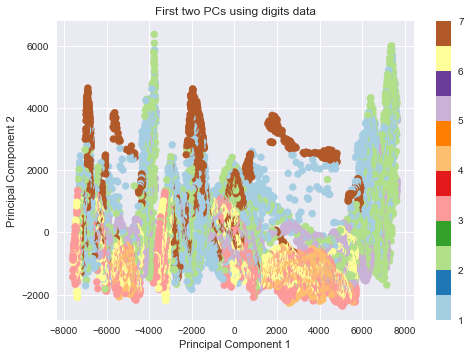

In [207]:
pca = PCA(n_components=2)
X_selected_2d = pca.fit_transform(pd.read_csv('data/train.csv'))
plt.scatter(X_selected_2d[:,0], X_selected_2d[:,1], c=y_train, s=50, cmap=plt.cm.Paired)
plt.colorbar()
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('First two PCs using digits data')
plt.show()

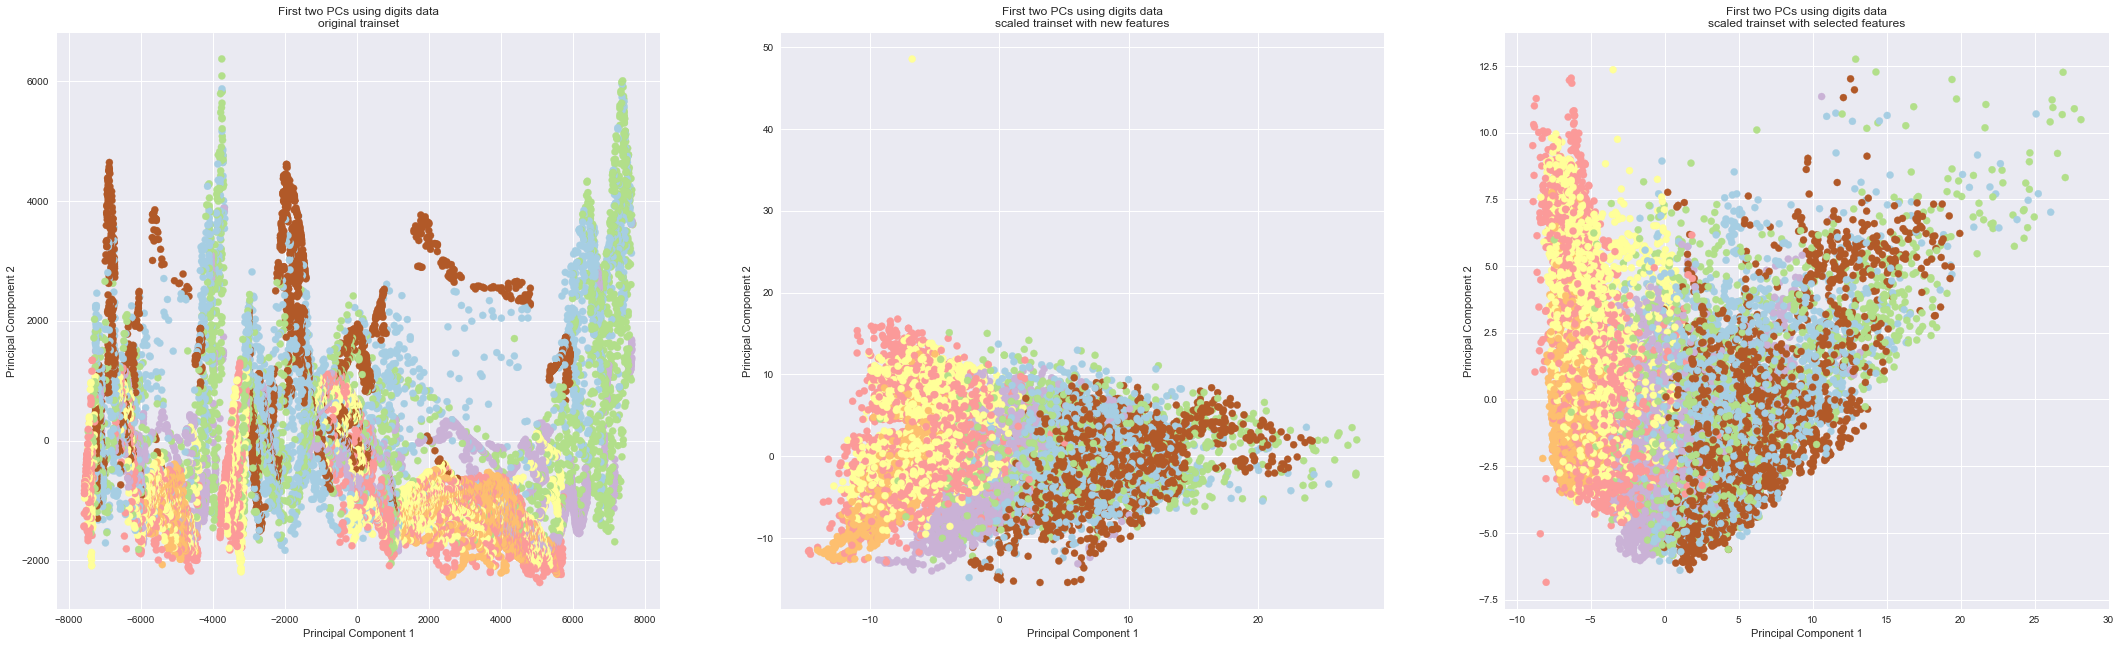

In [205]:
dfnames = ['original trainset', 'scaled trainset with new features', 'scaled trainset with selected features']
draw_2d_pca([pd.read_csv('data/train.csv'), X_scaled_train, X_scaled_train_best])

In [76]:
def draw_2d_lda(dfs, rows=1):
    
    f, atrain_dfarr = plt.subplots(rows, 3, figsize=(15, 8*rows))

    for i, df in enumerate(dfs):
        c = i
        lda = LDA(n_components=2)
        X_selected_2d = lda.fit_transform(df, y_train)
        
        atrain_dfarr[c].scatter(X_selected_2d[:,0], X_selected_2d[:,1], c=y_train, s=50, cmap=plt.cm.Paired)
        #atrain_dfarr[c].set_colorbar()
        atrain_dfarr[c].set_xlabel('Principal Component 1')
        atrain_dfarr[c].set_ylabel('Principal Component 2')
        atrain_dfarr[c].set_title('First two PCs using digits data\n'+dfnames[i])

    plt.subplots_adjust(left=0.1, right=2.0, top=1.0, bottom=0.0)
    plt.show()

C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


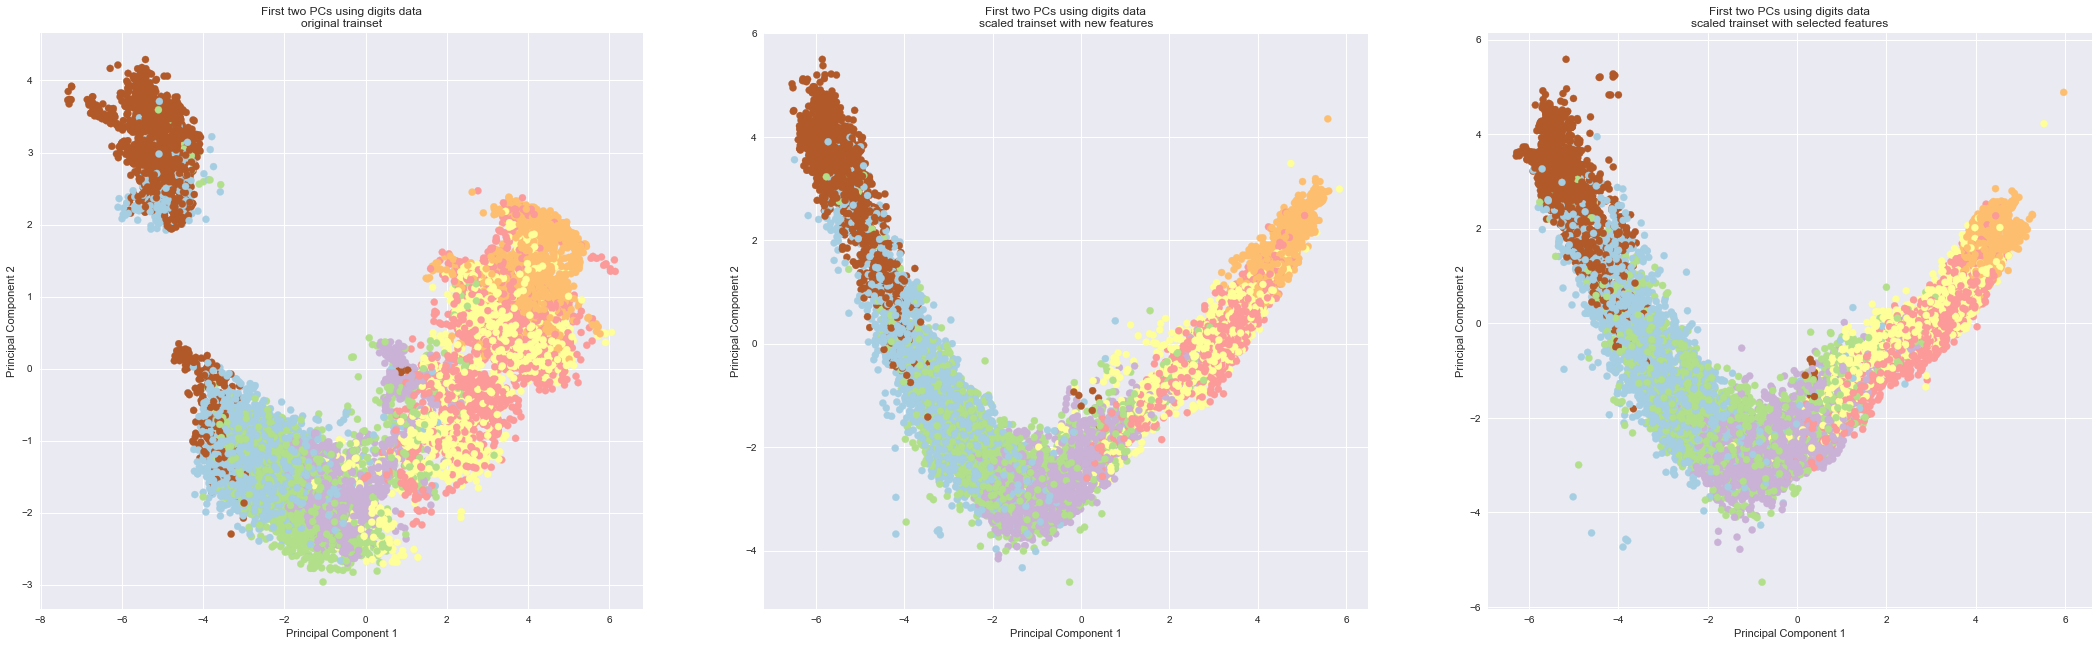

In [77]:
draw_2d_lda([pd.read_csv('data/train.csv'), X_scaled_train, X_scaled_train_best])

### Experiment 1. Class Weights
* Analyze which labels our best model do not predict well
* Add more weights to the labels found as week points

In [80]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [81]:
def draw_confmat(confmat):
    
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
    for i in range(confmat.shape[0]):
        for j in range(confmat.shape[1]):
            ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')
    plt.xlabel('predicted label')
    plt.ylabel('true label')
    plt.show()

In [104]:
y_train = pd.read_csv('data/train.csv', usecols=['Cover_Type']).values.ravel()

In [108]:
wrongs_tn = {'1':0, '2':0, '3':0, '4':0, '5':0, '6':0, '7':0}
wrongs_fp = {'1':0, '2':0, '3':0, '4':0, '5':0, '6':0, '7':0}
confmat_summed = []
wrongs_indices = {}

for i in range(10):
    X_train_, X_test_, y_train_, y_test_ = train_test_split(
                            X_scaled_train_best, y_train, test_size=0.1, random_state=i)
    
    etc_best_fit = etc_best.fit(X_train_, y_train_)
    y_hat = etc_best_fit.predict(X_test_)
    
    compare = pd.Series(y_test_ == y_hat)

    wrongs_idx = compare[compare==False].index
    wrongs = pd.Series(y_test_)[wrongs_idx].value_counts()
    
    for i in range(1, 8):
        wrongs_tn[str(i)] += wrongs[i]
        
    for widx in wrongs_idx:
        if widx in wrongs_indices:
            wrongs_indices[widx] += 1
        else:
            wrongs_indices[widx] = 1
    
    confmat = confusion_matrix(y_true=y_test_, y_pred=y_hat)
    
    if type(confmat_summed) != list:
        confmat_summed = np.add(confmat, confmat_summed)
    else:
        confmat_summed = confmat
    

In [109]:
len(wrongs_indices)

976

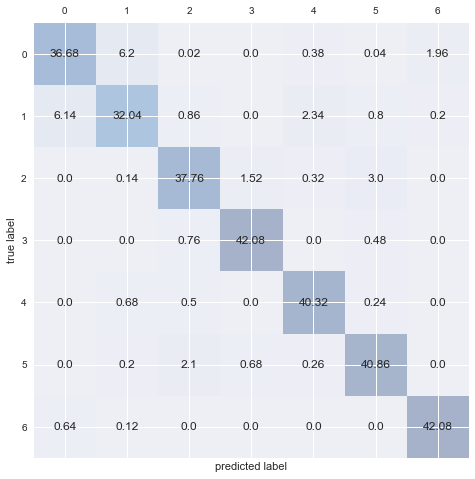

In [110]:
draw_confmat(confmat_summed/50)

In [111]:
confmat_avg = confmat_summed/50

* Number of `True Negative`s

In [112]:
tn = confmat_avg.sum(axis=1) - confmat_summed.diagonal()/50
tn_reg = tn / np.min(tn)
tn_reg

array([ 11.31578947,  13.60526316,   6.55263158,   1.63157895,
         1.86842105,   4.26315789,   1.        ])

* Number of `False Positive`s


In [113]:
fp = confmat_avg.sum(axis=0) - confmat_summed.diagonal()/50
fp_reg = fp / np.min(fp)
fp_reg

array([ 3.13888889,  3.39814815,  1.96296296,  1.01851852,  1.52777778,
        2.11111111,  1.        ])

In [114]:
test_weight_1 = {i+1 : tn for i, tn in enumerate(tn_reg)}
test_weight_2 = {i+1 : fp for i, fp in enumerate(fp_reg)}

In [115]:
test_weight_1

{1: 11.315789473684251,
 2: 13.605263157894768,
 3: 6.5526315789473912,
 4: 1.6315789473684186,
 5: 1.8684210526315861,
 6: 4.2631578947368558,
 7: 1.0}

In [116]:
test_weight_2

{1: 3.1388888888888942,
 2: 3.398148148148155,
 3: 1.962962962962967,
 4: 1.0185185185185215,
 5: 1.5277777777777788,
 6: 2.1111111111111156,
 7: 1.0}

In [117]:
test_weight_3 = {v1[0] : v1[1]*v2[1] for v1, v2  in zip(list(test_weight_1.items()), list(test_weight_2.items()))}

In [118]:
test_weight_3

{1: 35.519005847953402,
 2: 46.232699805068428,
 3: 12.862573099415275,
 4: 1.6617933723196905,
 5: 2.8545321637427028,
 6: 9.000000000000048,
 7: 1.0}

### Most of wrong predictions are found in class label `1`, `2`, `3` and `6`.
* Applying the class weights to our best model and see the score again
* `Blue` and `green` dots in the pca/lda graph below.

In [209]:
def draw_pca_lda_2d(X_, y_):
    pca = PCA(n_components=2)
    X_selected_2d = pca.fit_transform(X_)
    plt.scatter(X_selected_2d[:,0], X_selected_2d[:,1], c=y_train, s=50, cmap=plt.cm.Paired)
    plt.colorbar()
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title('First two PCs using digits data')
    plt.show()

    lda = LDA(n_components=2)
    X_selected_2d = lda.fit_transform(X_, y_)

    plt.scatter(X_selected_2d[:,0], X_selected_2d[:,1], c=y_train, s=50, cmap=plt.cm.Paired)
    plt.colorbar()
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title('First two PCs using digits data')
    plt.show()


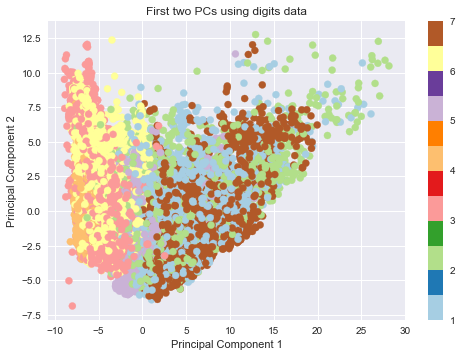

C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


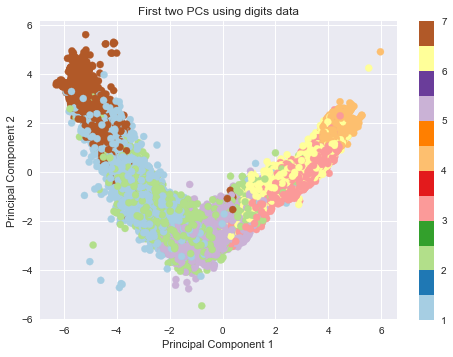

In [210]:
draw_pca_lda_2d(X_scaled_train_best, y_train)

In [124]:
etc_best.set_params(class_weight = test_weight_3)

ExtraTreesClassifier(bootstrap=False,
           class_weight={1: 35.519005847953402, 2: 46.232699805068428, 3: 12.862573099415275, 4: 1.6617933723196905, 5: 2.8545321637427028, 6: 9.000000000000048, 7: 1.0},
           criterion='gini', max_depth=50, max_features=0.3,
           max_leaf_nodes=None, min_impurity_decrease=0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=200, n_jobs=1, oob_score=False, random_state=0,
           verbose=0, warm_start=False)

In [125]:
cv_kfold(X_scaled_train_best, y_train, etc_best, 5)

[ 0.80257937  0.78935185  0.78637566  0.81547619  0.88723545]
0.816203703704 0.0369929584644


0.81620370370370376

In [126]:
# reset params and cross validate again
etc_best.set_params(class_weight = 'balanced')
cv_kfold(X_scaled_train_best, y_train, etc_best, 5)

[ 0.80588624  0.79497354  0.79398148  0.81812169  0.8859127 ]
0.819775132275 0.0342059758058


0.81977513227513232

### Not improved.
* Try again with bigger weights.

In [129]:
test_weight_3_sqrd = {k:v**2 for k,v in test_weight_3.items()}
test_weight_3_sqrd

{1: 1261.599776426948,
 2: 2137.4625312655744,
 3: 165.44578673780148,
 4: 2.7615572122856493,
 5: 8.1483538738415966,
 6: 81.000000000000867,
 7: 1.0}

In [130]:
# set params and cross validate again - score dropped more.
etc_best.set_params(class_weight = test_weight_3_sqrd)
cv_kfold(X_scaled_train_best, y_train, etc_best, 5)

[ 0.8015873   0.77579365  0.78439153  0.81216931  0.88227513]
0.811243386243 0.0377288005252


0.81124338624338621

### Was the weights way too big?
* Apply `np.log` for smoothing and test again.

In [131]:
test_weight_3_log = {k:np.log(v+1) for k,v in test_weight_3.items()}
test_weight_3_log

{1: 3.5978328332300999,
 2: 3.855086445201843,
 3: 2.6291926258395182,
 4: 0.97900009574299107,
 5: 1.3492496413479773,
 6: 2.3025850929940503,
 7: 0.69314718055994529}

In [132]:
etc_best.set_params(class_weight = test_weight_3_log)
cv_kfold(X_scaled_train_best, y_train, etc_best, 5)

[ 0.80357143  0.79100529  0.7906746   0.81415344  0.88260582]
0.816402116402 0.0342330751198


0.81640211640211646

* Who knows? Let's try the `test_weight_1` and `test_weight_2`.

In [133]:
etc_best.set_params(class_weight = test_weight_1)
cv_kfold(X_scaled_train_best, y_train, etc_best, 5)

[ 0.80191799  0.79001323  0.79365079  0.81812169  0.88458995]
0.817658730159 0.0348379904287


0.81765873015873025

In [134]:
etc_best.set_params(class_weight = test_weight_2)
cv_kfold(X_scaled_train_best, y_train, etc_best, 5)

[ 0.80026455  0.79133598  0.78736772  0.81646825  0.8859127 ]
0.81626984127 0.0362308324143


0.81626984126984126

### Assumption
* Each data sample is not properly divided due to the duplicated / collinear columns
* **`What if we exclude the correlated columns(numerical)?`**

In [213]:
X_scaled_train_best.columns

Index(['Aspect', 'Elevation', 'Elevation_log', 'Elevation_log_cdf_2',
       'Elevation_log_cdf_3', 'Elevation_log_cdf_6', 'Elevation_log_pdf_2',
       'Elevation_log_pdf_3', 'Elevation_log_pdf_5', 'Elevation_log_pdf_6',
       'Elevation_log_wild_cdf_11', 'Elevation_log_wild_cdf_21',
       'Elevation_log_wild_cdf_31', 'Elevation_log_wild_cdf_61',
       'Elevation_log_wild_pdf_21', 'Elevation_log_wild_pdf_61',
       'Hillshade_9am', 'Horizontal_Distance_To_Fire_Points',
       'Horizontal_Distance_To_Fire_Points_log',
       'Horizontal_Distance_To_Hydrology',
       'Horizontal_Distance_To_Hydrology_log',
       'Horizontal_Distance_To_Roadways',
       'Horizontal_Distance_To_Roadways_log', 'Soil_Type10',
       'Vertical_Distance_To_Hydrology_log', 'Wilderness_Area',
       'Wilderness_Area3', 'Soil_Type', 'Soils_Cover3', 'Soils_Cover5',
       'Soils_Cover6', 'Soils_Cover7', 'Elevation_cube', 'Aspect_sqrd',
       'Horizontal_Distance_To_Hydrology_sqrd',
       'Horizontal_Dist

In [ ]:
columns_excluding_dups = ['Aspect', 'Elevation', 'Elevation_log', 'Elevation_log_cdf_2',
       'Elevation_log_cdf_3', 'Elevation_log_cdf_6', 'Elevation_log_pdf_2',
       'Elevation_log_pdf_3', 'Elevation_log_pdf_5', 'Elevation_log_pdf_6',
       'Elevation_log_wild_cdf_11', 'Elevation_log_wild_cdf_21',
       'Elevation_log_wild_cdf_31', 'Elevation_log_wild_cdf_61',
       'Elevation_log_wild_pdf_21', 'Elevation_log_wild_pdf_61',
       'Hillshade_9am', 'Horizontal_Distance_To_Fire_Points',
       'Horizontal_Distance_To_Fire_Points_log',
       'Horizontal_Distance_To_Hydrology',
       'Horizontal_Distance_To_Hydrology_log',
       'Horizontal_Distance_To_Roadways',
       'Horizontal_Distance_To_Roadways_log', 'Soil_Type10',
       'Vertical_Distance_To_Hydrology_log', 'Wilderness_Area',
       'Wilderness_Area3', 'Soil_Type', 'Soils_Cover3', 'Soils_Cover5',
       'Soils_Cover6', 'Soils_Cover7', 'Elevation_cube', 'Aspect_sqrd',
       'Horizontal_Distance_To_Hydrology_sqrd',
       'Horizontal_Distance_To_Roadways_sqrd',
       'Horizontal_Distance_To_Roadways_cube', 'Hillshade_9am_sqrd',
       'Hillshade_9am_cube', 'Hillshade_Noon_sqrd', 'Hillshade_Noon_cube',
       'Horizontal_Distance_To_Fire_Points_sqrd',
       'Horizontal_Distance_To_Fire_Points_cube',
       'Diagnoal_Distance_To_Hydrology', 'Vertical_Distance_Diff_EH',
       'Horizontal_Distance_Sum_HRF', 'Horizontal_Distance_Sum_HR',
       'Horizontal_Distance_Sum_HF', 'Horizontal_Distance_Sum_RF',
       'Horizontal_Distance_Diff_HRF', 'Horizontal_Distance_Diff_HR',
       'Horizontal_Distance_Diff_HF', 'Horizontal_Distance_Diff_RF',
       'Horizontal_Distance_Mult_HRF', 'Horizontal_Distance_Mult_HR',
       'Horizontal_Distance_Mult_HF', 'Horizontal_Distance_Mult_RF',
       'Hillshade_Sum_0912', 'Hillshade_Mult_0912', 'Radians_To_Hydrology',
       'Vertical_Distance_Sum_EH_sqrd', 'Vertical_Distance_Sum_EH_cube',
       'Vertical_Distance_Diff_EH_sqrd', 'Vertical_Distance_Diff_EH_cube',
       'Horizontal_Distance_Sum_HRF_sqrd', 'Horizontal_Distance_Sum_HR_sqrd',
       'Horizontal_Distance_Sum_HR_cube', 'Horizontal_Distance_Sum_HF_sqrd',
       'Horizontal_Distance_Sum_HF_cube', 'Horizontal_Distance_Sum_RF_sqrd',
       'Horizontal_Distance_Sum_RF_cube', 'Horizontal_Distance_Diff_HRF_sqrd',
       'Horizontal_Distance_Diff_HRF_cube', 'Horizontal_Distance_Diff_HR_sqrd',
       'Horizontal_Distance_Diff_HR_cube', 'Horizontal_Distance_Diff_HF_sqrd',
       'Horizontal_Distance_Diff_RF_sqrd', 'Horizontal_Distance_Diff_RF_cube',
       'Horizontal_Distance_Mult_RF_sqrd', 'Hillshade_Sum_cube',
       'Hillshade_Sum_0912_sqrd', 'Hillshade_Sum_0912_cube',
       'Hillshade_Diff_cube', 'Hillshade_Diff_1215_sqrd',
       'Hillshade_Diff_1215_cube', 'Hillshade_Mult_0912_sqrd',
       'Hillshade_Mult_0912_cube']

### Submit the predictions to Kaggle with models using 5 different weights.

|balanced_acc|test_weight_3_acc|test_weight_3_sqrd|

* test_weight_3
* test_weight_3

### Experiment 2. Custom Voting Classifier
* Create multiple models that show relatively high performance where our best model show low performance.
  * Manually train those models - `models participating in votes will have different points of view.`
* Extract the predictions manually using `.predict_proba` method
  * Gridsearch the best parameter that determine how much each model's score reflects to the combined score

In [12]:
# KNeighbors
# 그리드 검색을 통한 하이퍼파라미터 튜닝

pipe_svc = Pipeline([('dim', PCA()),
                     ('clf', KNeighborsClassifier(n_neighbors=7))])

param_grid = [{'dim__n_components' : range(2, 50),
              'clf__algorithm': ['auto'],
              'clf__weights':['uniform', 'distance'],
              'clf__metric': ['minkowski'],
              'clf__p' : [1, 2]}]

gs_test_knn = GridSearchCV(estimator=pipe_svc,
                             param_grid = param_grid,
                              scoring='accuracy',
                             cv=5, n_jobs=-1)

gs_test_knn = gs_test_knn.fit(X_scaled_train_best, y_train)

print(gs_test_knn.best_score_)
print(gs_test_knn.best_params_)
print('#####')

0.760912698413
{'clf__weights': 'distance', 'clf__algorithm': 'auto', 'clf__metric': 'minkowski', 'clf__p': 1, 'dim__n_components': 36}
#####


In [13]:
pipe_svc = Pipeline([('dim', LDA()),
                     ('clf', KNeighborsClassifier(n_neighbors=7))])

param_grid = [{'dim__n_components' : range(2, 50),
              'clf__algorithm': ['auto'],
              'clf__weights':['uniform', 'distance'],
              'clf__metric': ['minkowski'],
              'clf__p' : [1, 2]}]

gs_test_knn2 = GridSearchCV(estimator=pipe_svc,
                 param_grid = param_grid,
                  scoring='accuracy',
                 cv=5, n_jobs=-1)

gs_test_knn2 = gs_test_knn2.fit(X_scaled_train_best, y_train)

print(gs_test_knn2.best_score_)
print(gs_test_knn2.best_params_)
print('#####')

0.699338624339
{'clf__weights': 'distance', 'clf__algorithm': 'auto', 'clf__metric': 'minkowski', 'clf__p': 2, 'dim__n_components': 6}
#####


C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


In [14]:
# Logistic Regression
# 그리드 검색을 통한 하이퍼파라미터 튜닝

pipe_svc = Pipeline([('dim', LDA()),\
                    ('clf', LogisticRegression(random_state=0))])

param_range = [0.001, 0.01, 0.1]
param_grid = [{'dim__n_components': np.arange(2,50),
              'clf__C': param_range,
              'clf__penalty':['l1', 'l2']}]

gs_test_lr = GridSearchCV(estimator=pipe_svc,
                 param_grid = param_grid,
                  scoring='accuracy',
                 cv=5, n_jobs=-1)

gs_test_lr = gs_test_lr.fit(X_scaled_train_best, y_train)

print(gs_test_lr.best_score_)
print(gs_test_lr.best_params_)
print('#####')

C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


0.669576719577
{'dim__n_components': 6, 'clf__C': 0.1, 'clf__penalty': 'l1'}
#####


In [ ]:
# SVC
# 그리드 검색을 통한 하이퍼파라미터 튜닝

pipe_svc = Pipeline([('clf', SVC(random_state=0))])

param_range = [0.0001, 0.001, 0.01, 1.0, 10.0]
param_grid = [{'clf__C': param_range,
              'clf__kernel':['linear']},
             {'clf__C': param_range,
             'clf__gamma': param_range,
             'clf__kernel': ['rbf']}]

gs = GridSearchCV(estimator=pipe_svc,
                 param_grid = param_grid,
                  scoring='accuracy',
                 cv=10, n_jobs=-1)

gs = gs.fit(X_scaled_train[rf_rfecv], y_train)